# Session 3
Simone Mistrali

ID:2119119 

In [1]:
library(ggplot2)
library(tibble)
library(purrr)
library(GoFKernel)
library(tidyverse)
library(lubridate)
library(data.table)
library(scales)

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ dplyr   1.0.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘data.table’

The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose


Attaching package: ‘scales’

The following object is masked from ‘package:readr’:

    col_factor

The following object is masked from ‘package:purrr’

# Ex 1


In [4]:
f1<- function(x,a=0,b=4,c=2) {2*(x-a)/((b-a)*(c-a))}
f2<- function(x,a=0,b=4,c=2) {2*(b-x)/((b-a)*(b-c))}
f <- function(x,a=0,b=4,c=2){
    if (c<a | c>b ) stop("c does not belong to [a,b]")
    ifelse (x>=a & x<c,
           2*(x-a)/((b-a)*(c-a)),
            ifelse(x>=c & x<b,
                   2*(b-x)/((b-a)*(b-c)),
                   0)) 
}
a <- 0
b <- 4
c <- 2
f1i<- function(x,a,b,c) {(x**2-a*x)/((b-a)*(c-a))}

f2i <- function(x,a,b,c) {(b*x-.5*x**2)/((b-a)*(b-c))}
cdf <- function(x,a=0,b=4,c=2){
    if (c<a | c>b ) stop("c does not belong to [a,b]")
    ifelse (x>=a & x<c,
           (x^2-2*a*x)/((b-a)*(c-a)),
            ifelse(x>=c & x<=b,
                   (2*b*x-x^2)/((b-a)*(b-c))-1,
                   ifelse(x>b,1,0))) 
}
qdf <- Vectorize(inverse(cdf,lower=a, upper=b))

rdf <- function(x){
    return (qdf(runif(x)))
}

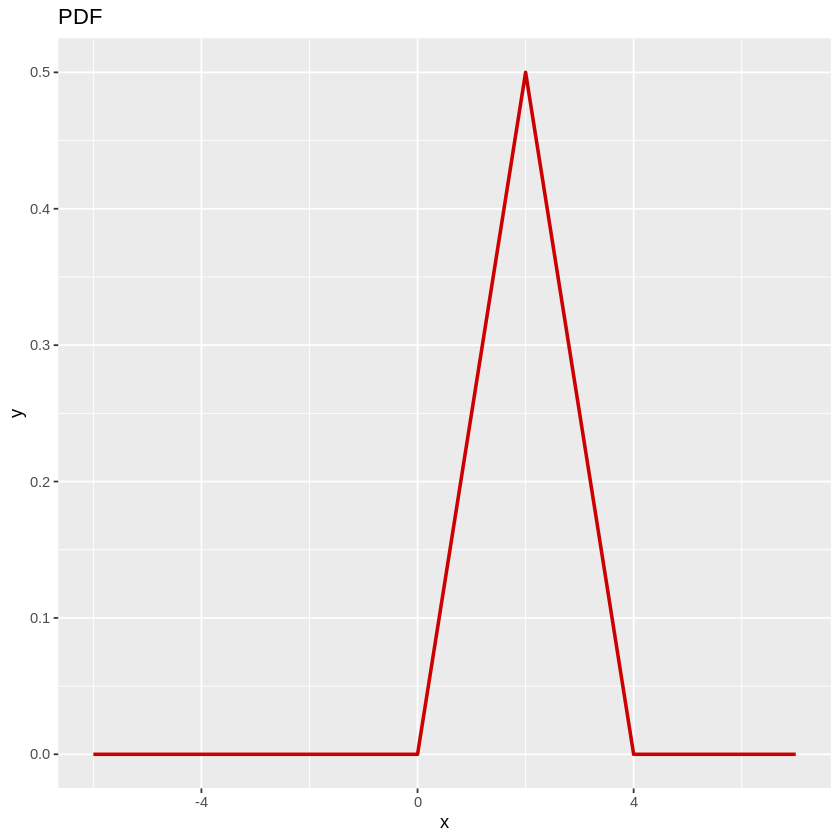

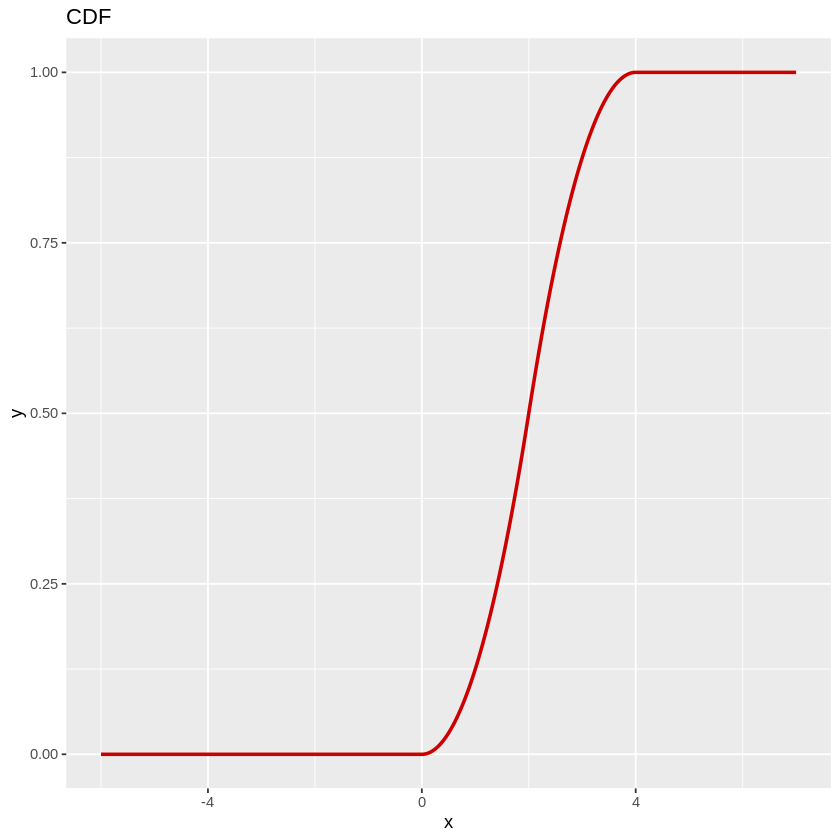

In [5]:
x <- seq(-6, 7,  0.01)
df <- tibble(x=x,y=f(x,a,b,c))
ggplot(df, aes(x,y))+ggtitle("PDF") + 
  geom_line(colour="#CC0000",size=1)
df1 <- tibble(x=x,y=cdf(x,a,b,c))
ggplot(df1, aes(x,y)) +ggtitle("CDF")+ 
  geom_line(colour="#CC0000",size=1)

In [6]:
rand<-rdf(10000)
x<-seq(0,4,0.01)

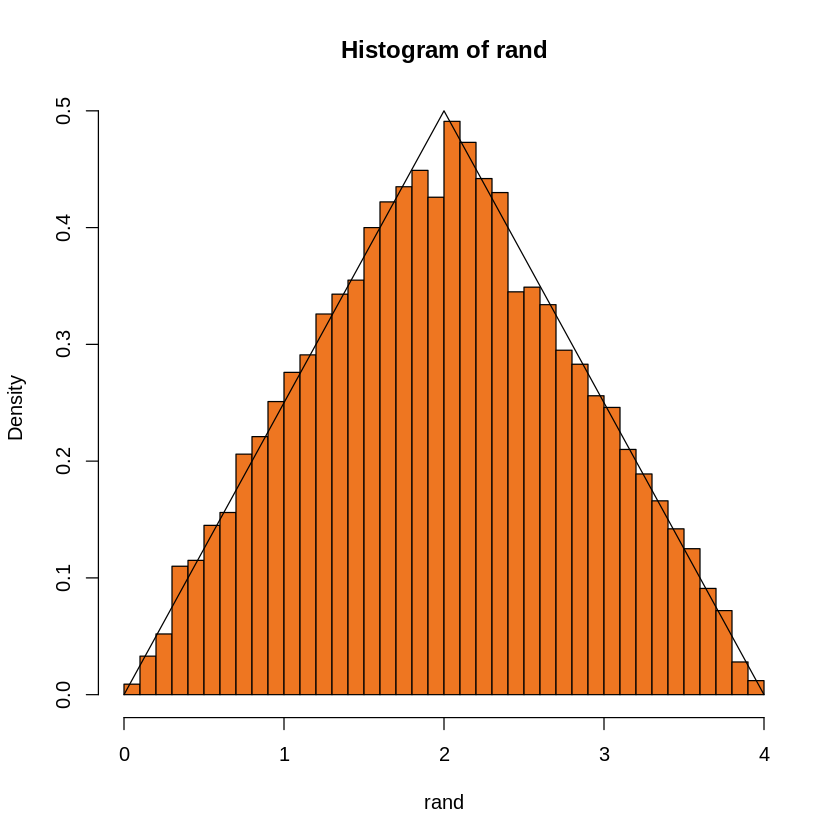

In [15]:
hist(rand,freq=FALSE,breaks=50,col='Chocolate2')
lines(x,f(x,a,b,c))

# Ex 2

### Exponential

integer(0)

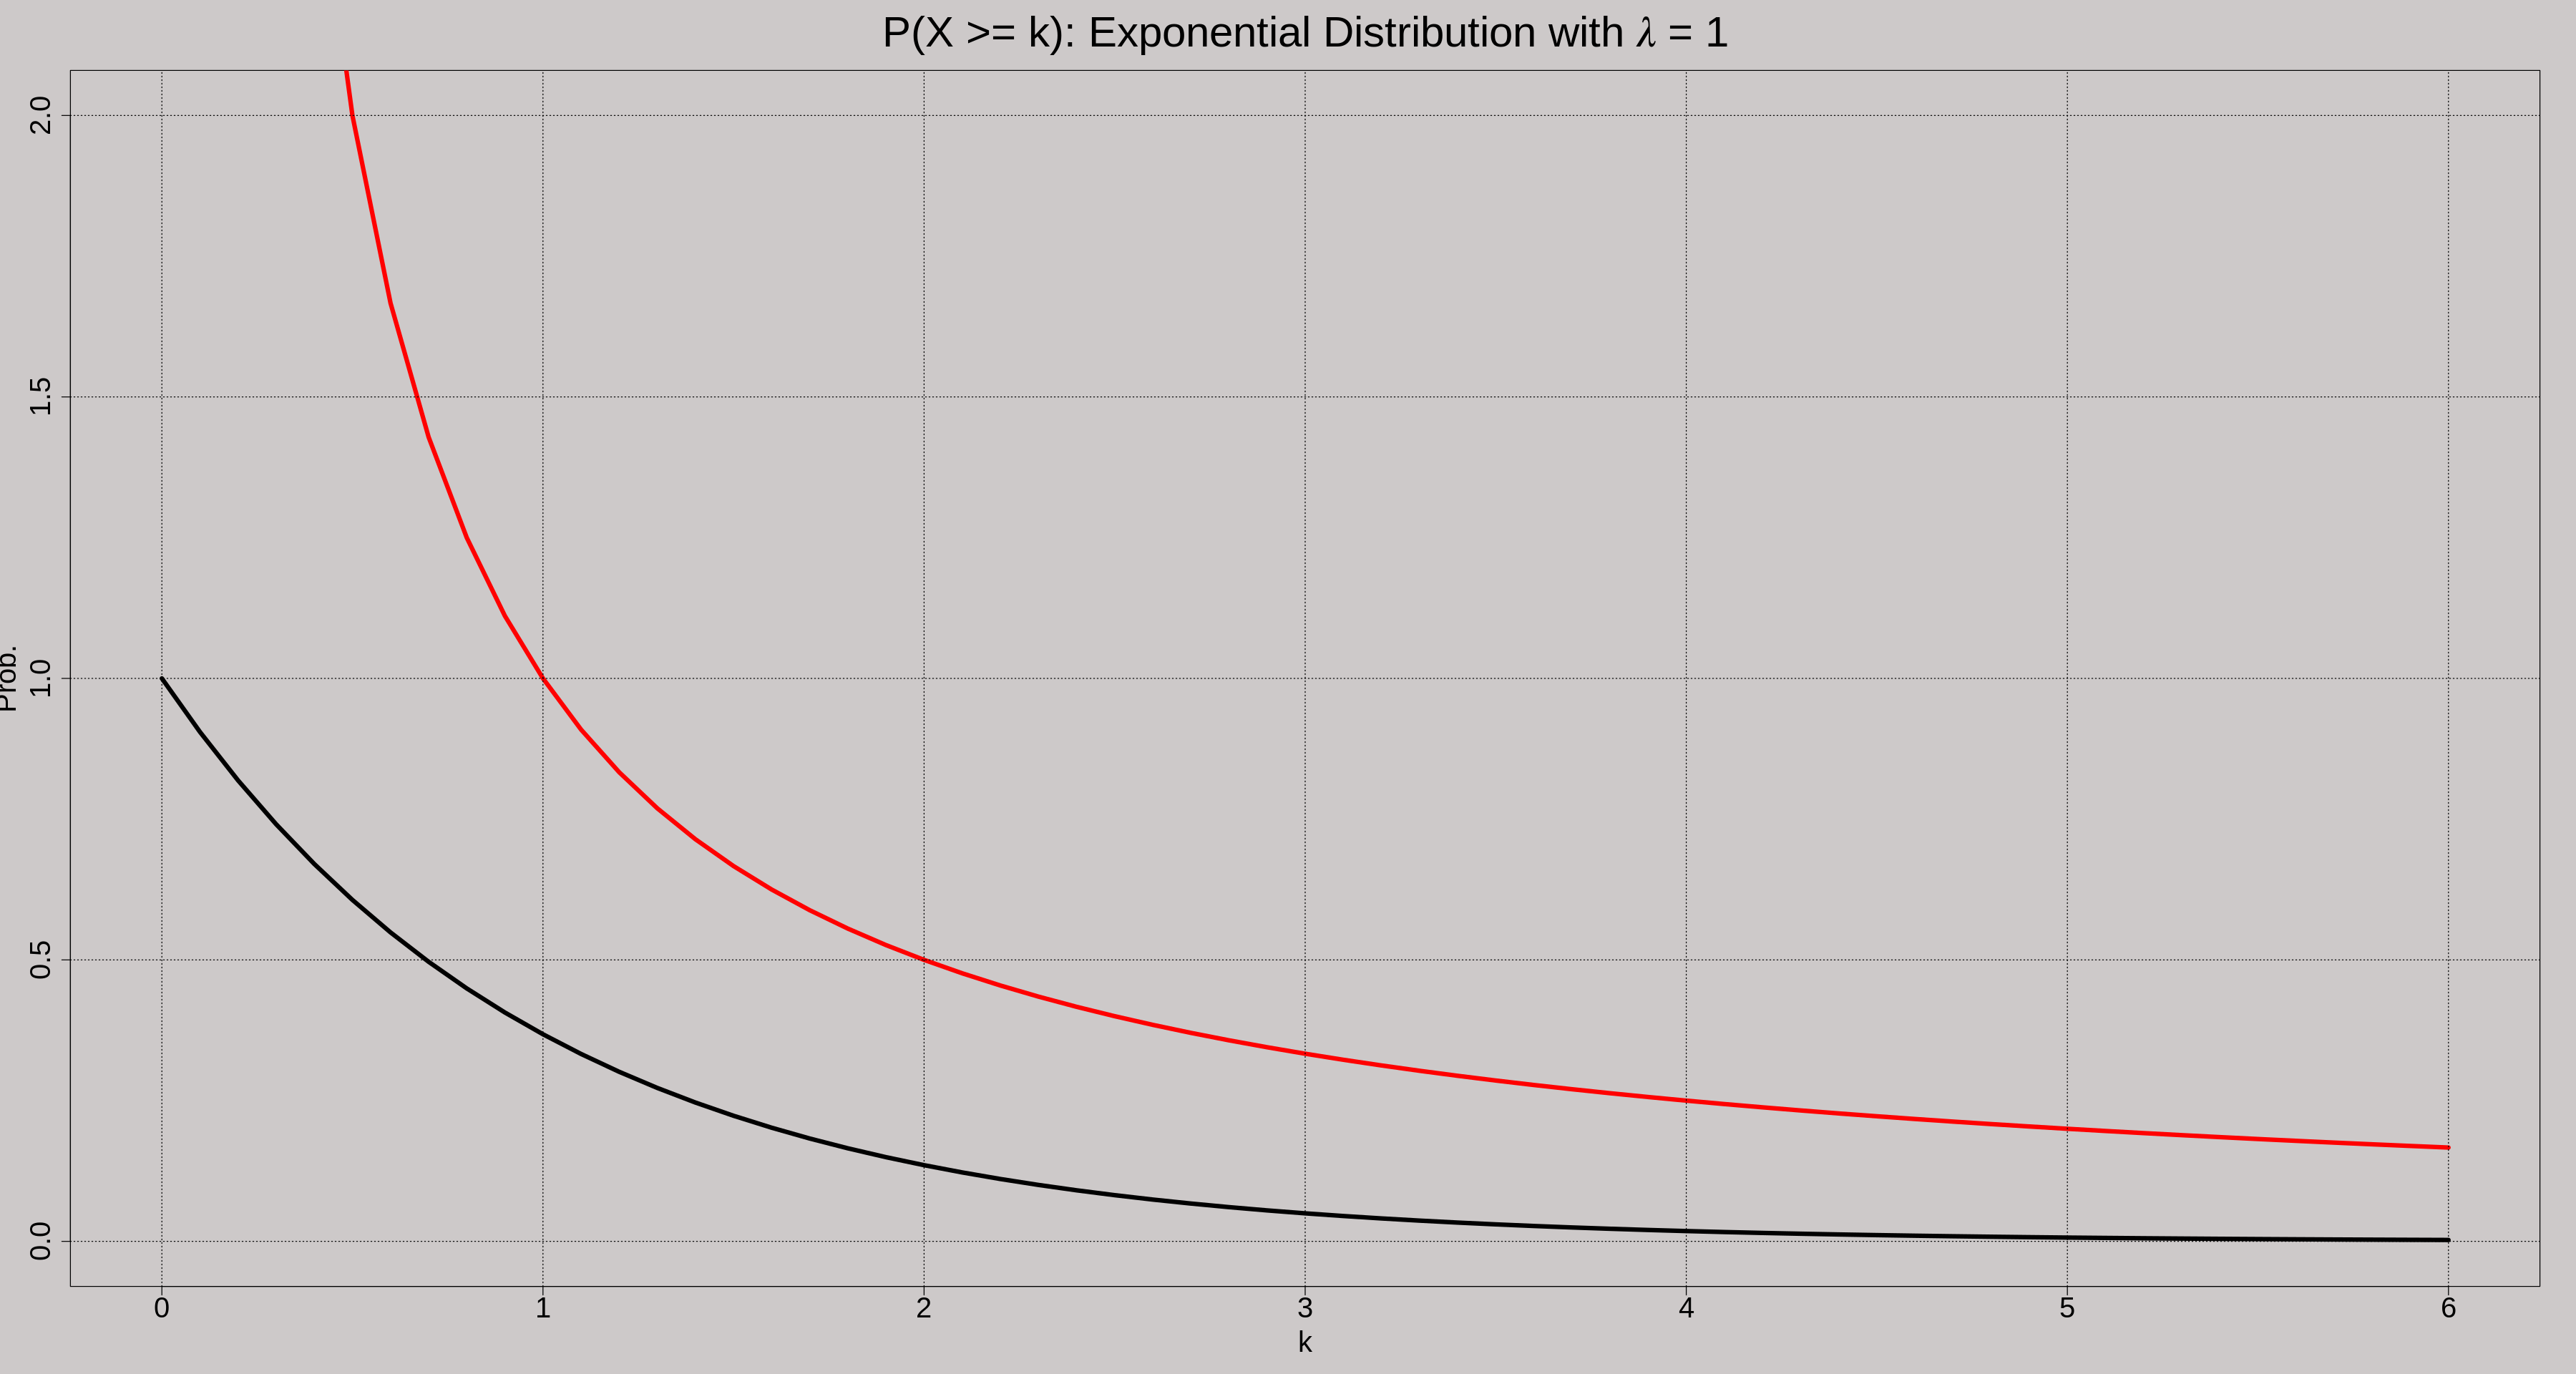

In [22]:

options(repr.plot.width=30, repr.plot.height=16)

lambda <- 1 
x <- seq(0, 6, 0.1)
y <- 1-pexp(x, rate = lambda)

xn <- x[-1]
exp <- 1/lambda     
ubound <- exp/xn 


par(bg="snow3")
plot(x,y, type='l',lwd=5, col='black', xlab='k', ylab="Prob.",  
    main=expression("P(X >= k): Exponential Distribution with 𝜆 = 1"),
     ylim=c(0,2), cex.main=3, cex.lab=2, cex.axis=2)
lines(xn,ubound, type='l', col='red', lwd=5)+grid(col="black")


### Uniform


integer(0)

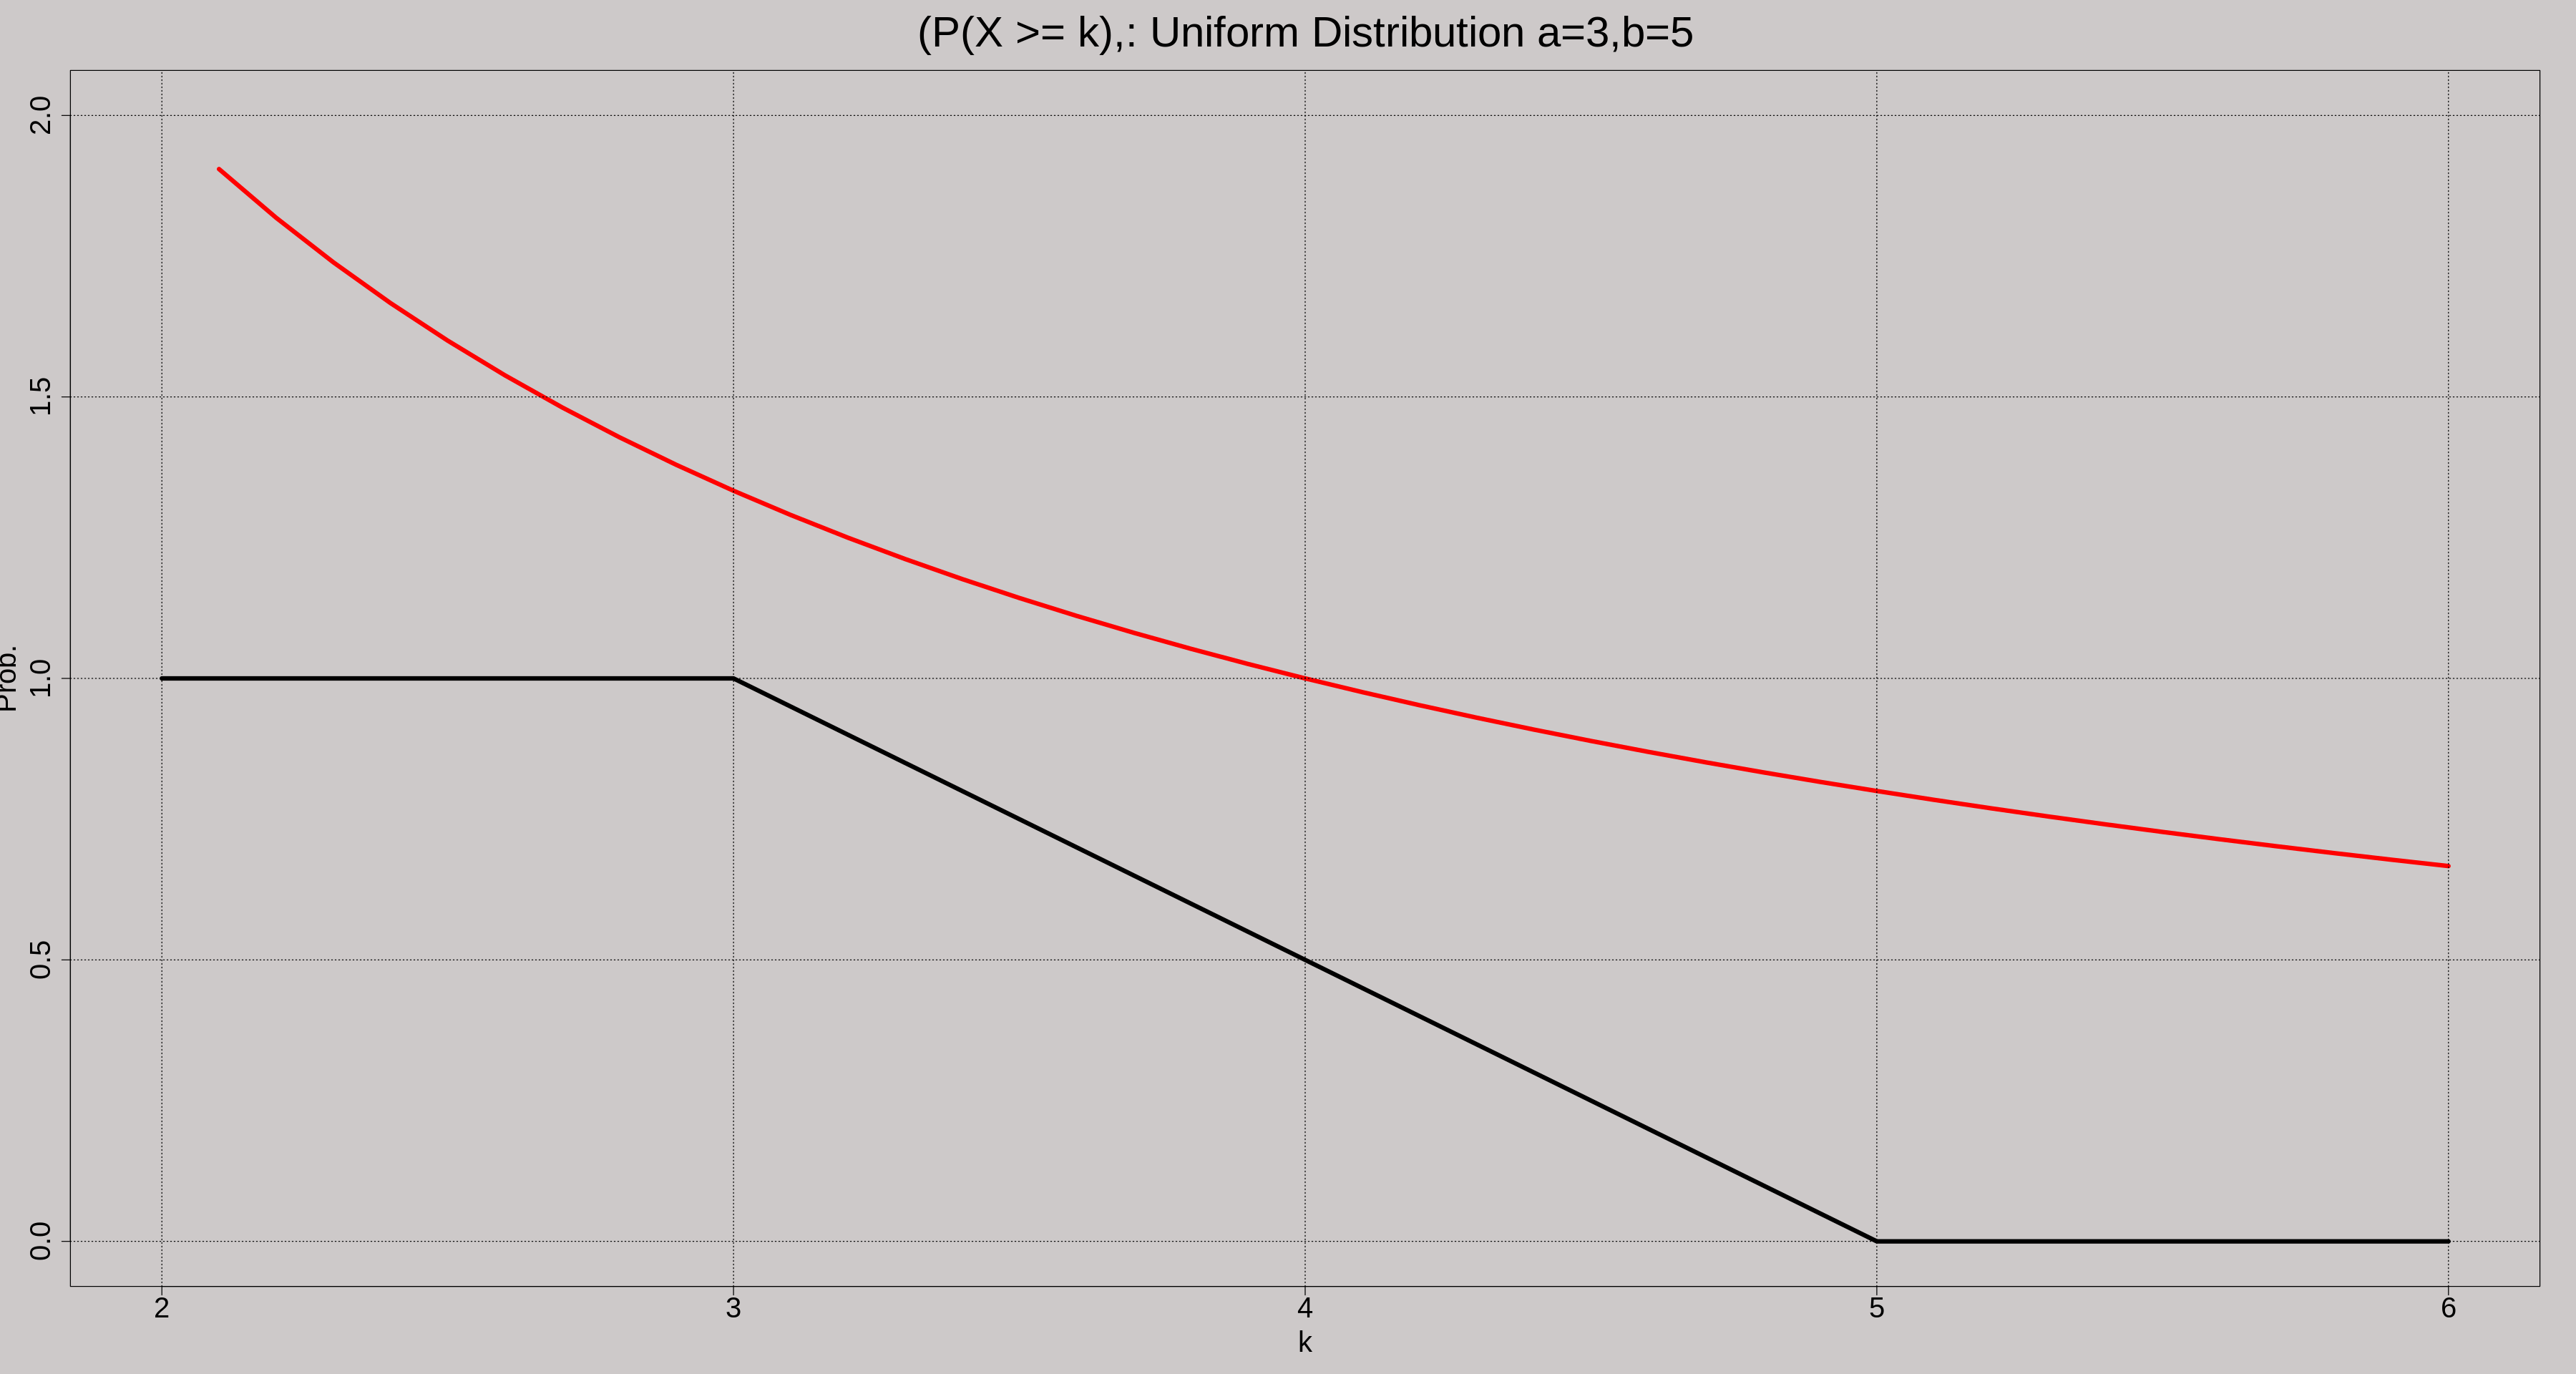

In [23]:
a <- 3
b <- 5
x <- seq(2, 6, 0.1)
y <- 1-punif(x, min=a,max=b)

xn <- x[-1]
exp <- (a+b)*0.5
ubound <- exp/xn 


par(bg="snow3")
plot(x,y, type='l',lwd=5, col='black', xlab='k', ylab="Prob.",  
    main=expression("(P(X >= k),: Uniform Distribution a=3,b=5"),
     ylim=c(0,2), cex.main=3, cex.lab=2, cex.axis=2)
lines(xn,ubound, type='l', col='red', lwd=5)+grid(col="black")


### Binomial

integer(0)

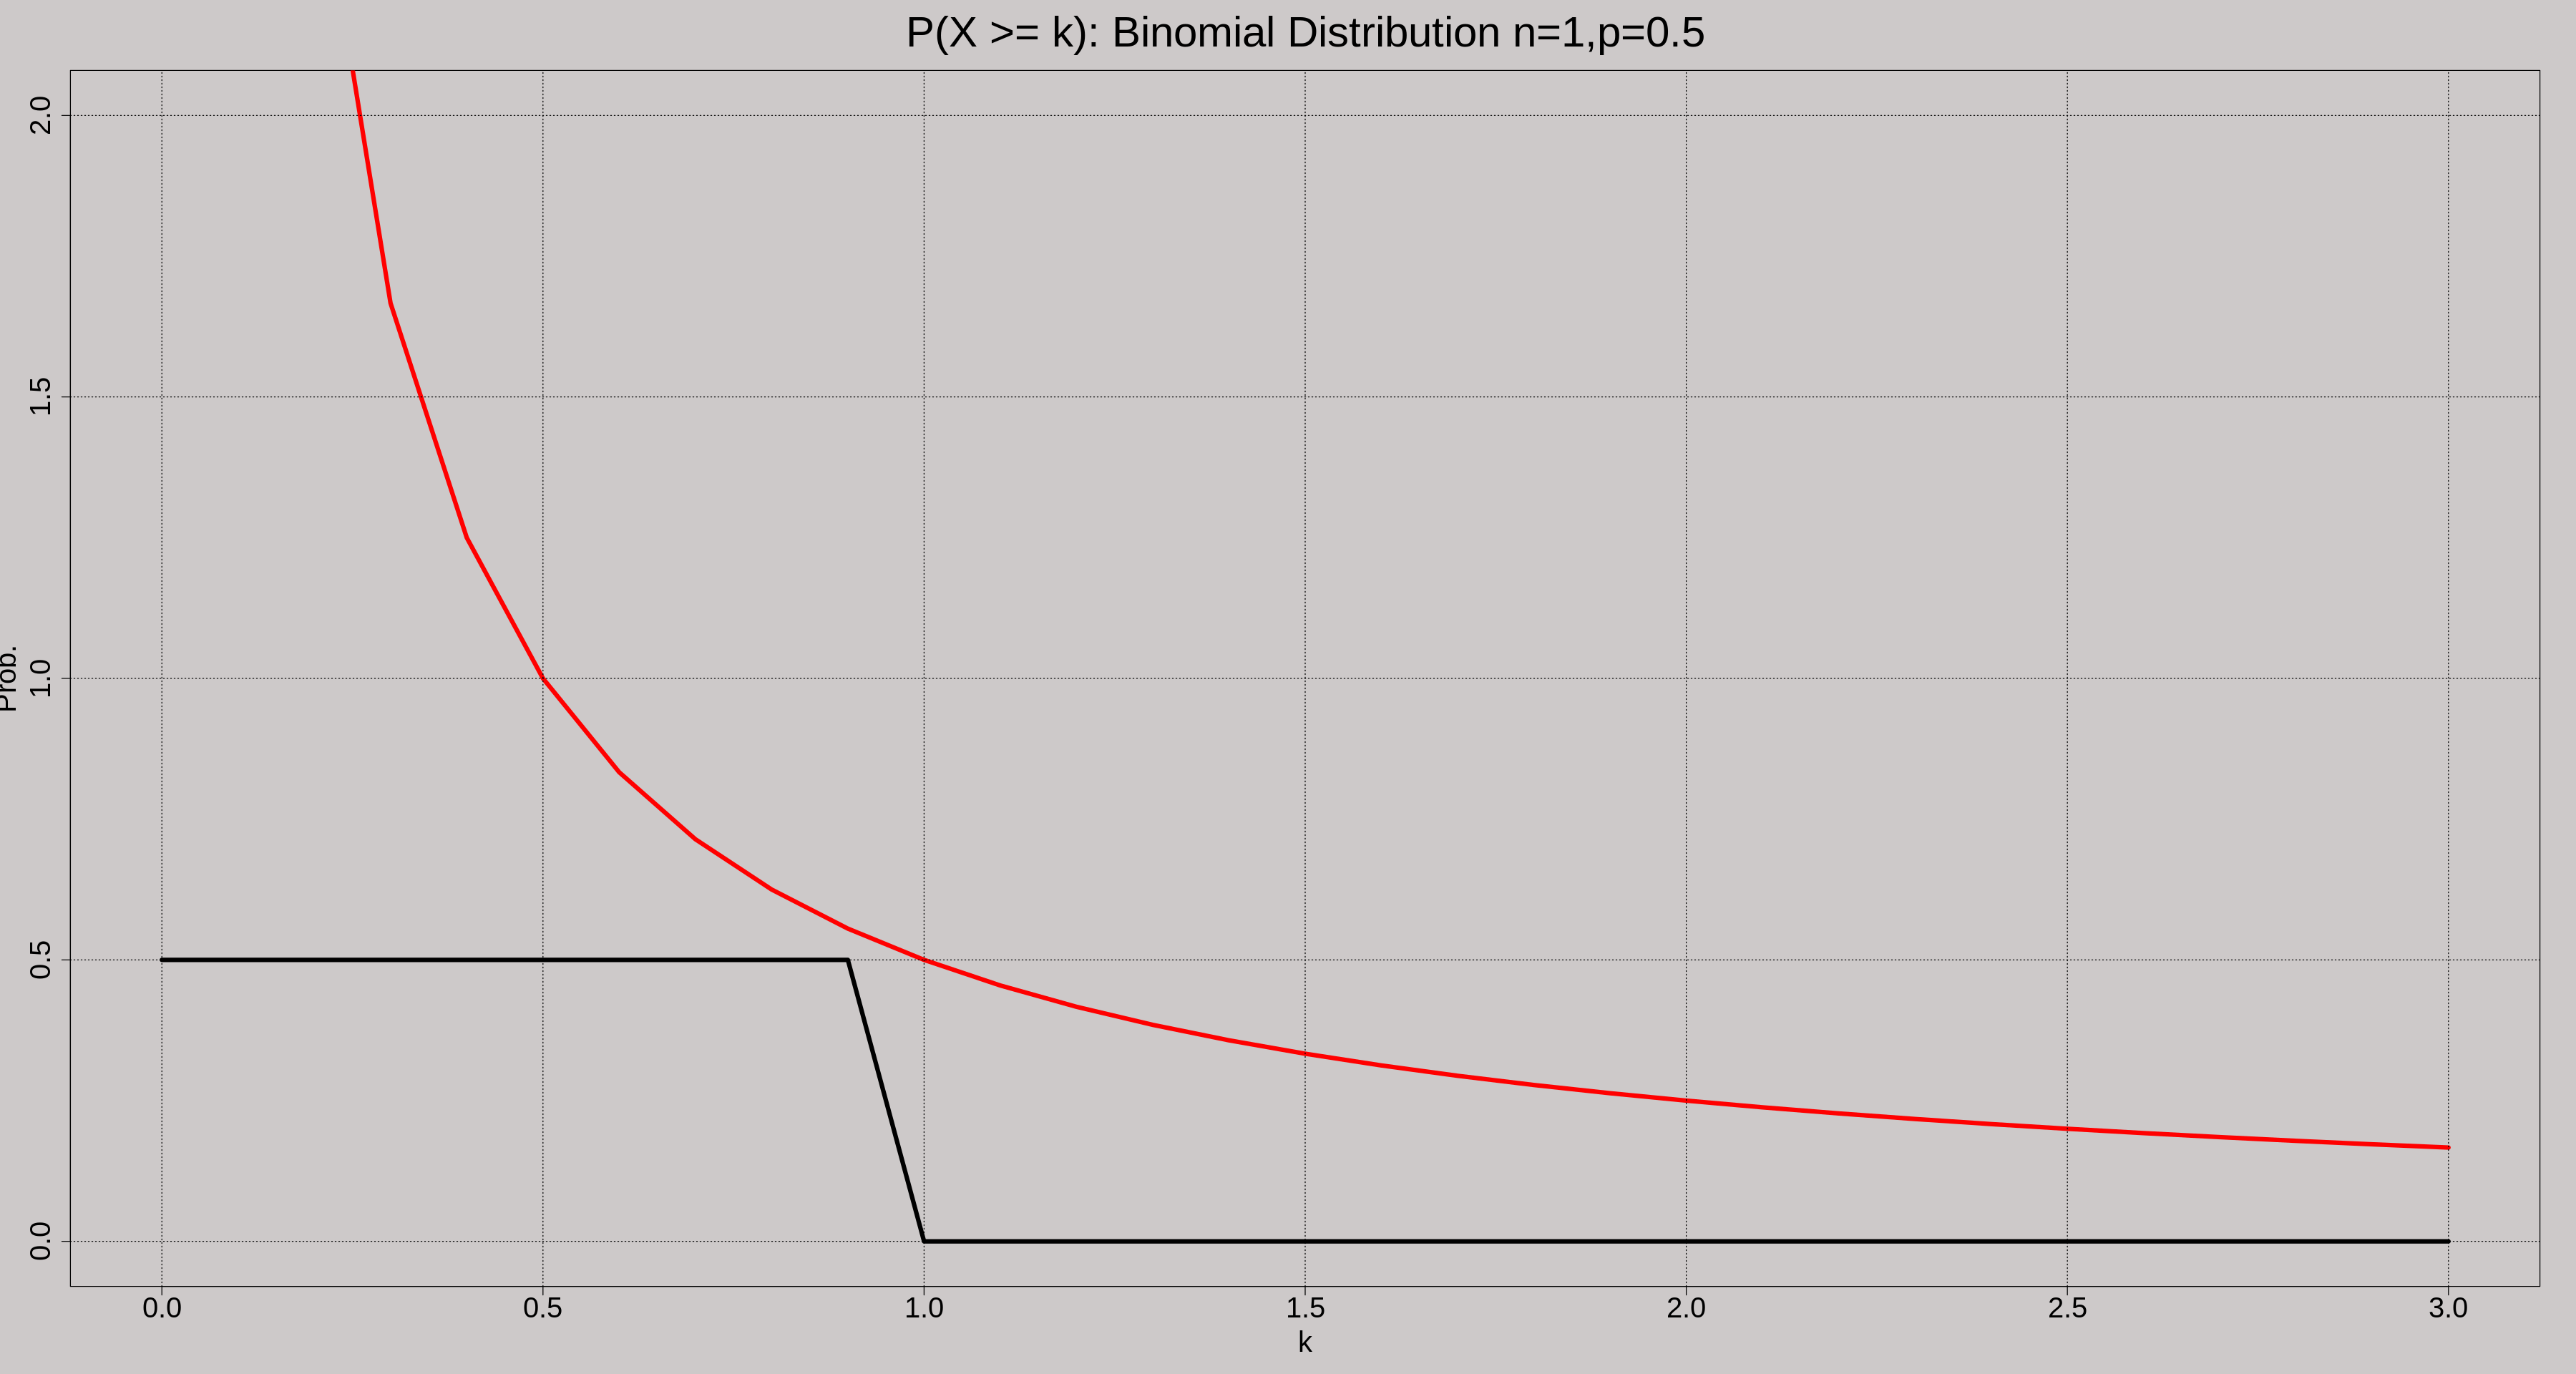

In [30]:
n1 <- 1
p2 <- 0.5
x <- seq(0, 3, 0.1)
y <- 1-pbinom(x, size=n1,prob=p2)

xn <- x[-1]
exp <- n*p
ubound <- exp/xn 


par(bg="snow3")
plot(x,y, type='l',lwd=5, col='black', xlab='k', ylab="Prob.",  
    main=expression("P(X >= k): Binomial Distribution n=1,p=0.5"),
     ylim=c(0,2), cex.main=3, cex.lab=2, cex.axis=2)
lines(xn,ubound, type='l', col='red', lwd=5)+grid(col="black")


### Poisson

integer(0)

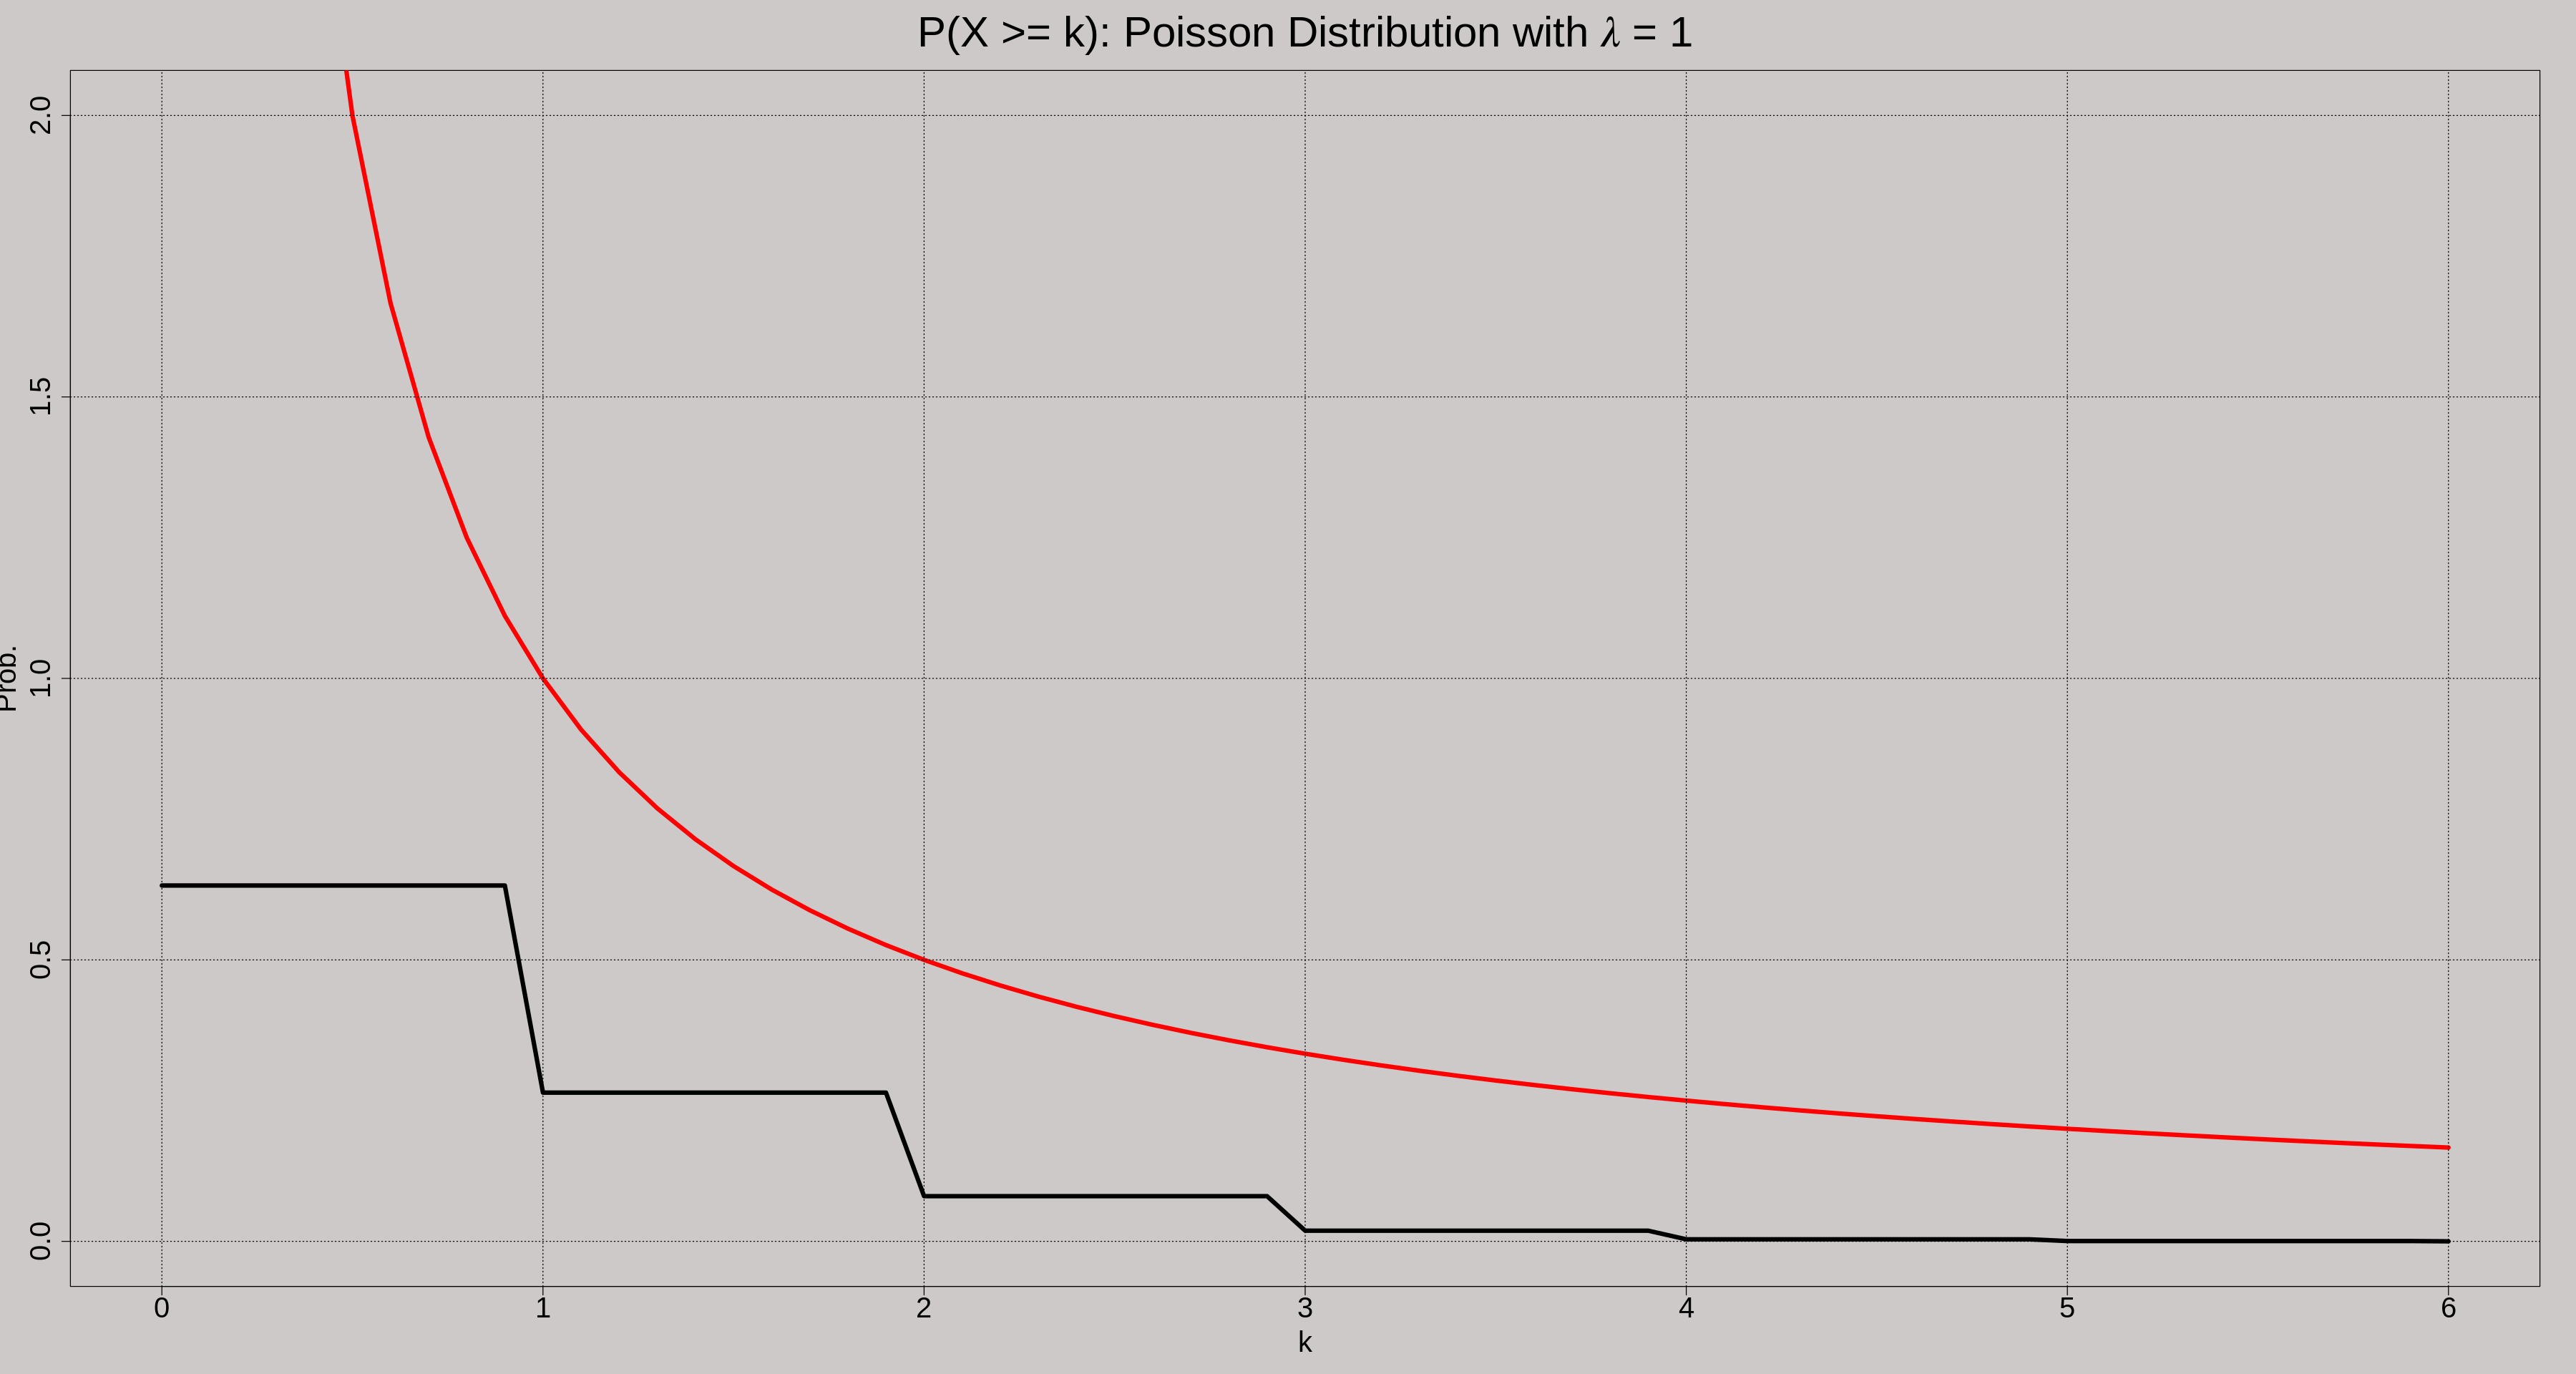

In [32]:
lambda <- 1 
x <- seq(0, 6, 0.1)
y <- 1-ppois(x, lambda = lambda)

xn <- x[-1]
exp <- lambda     
ubound <- exp/xn 



par(bg="snow3")
plot(x,y, type='l',lwd=5, col='black', xlab='k', ylab="Prob.",  
    main=expression("P(X >= k): Poisson Distribution with 𝜆 = 1"),
     ylim=c(0,2), cex.main=3, cex.lab=2, cex.axis=2)
lines(xn,ubound, type='l', col='red', lwd=5)+grid(col="black")


# Ex 3

## Normal distribution

integer(0)

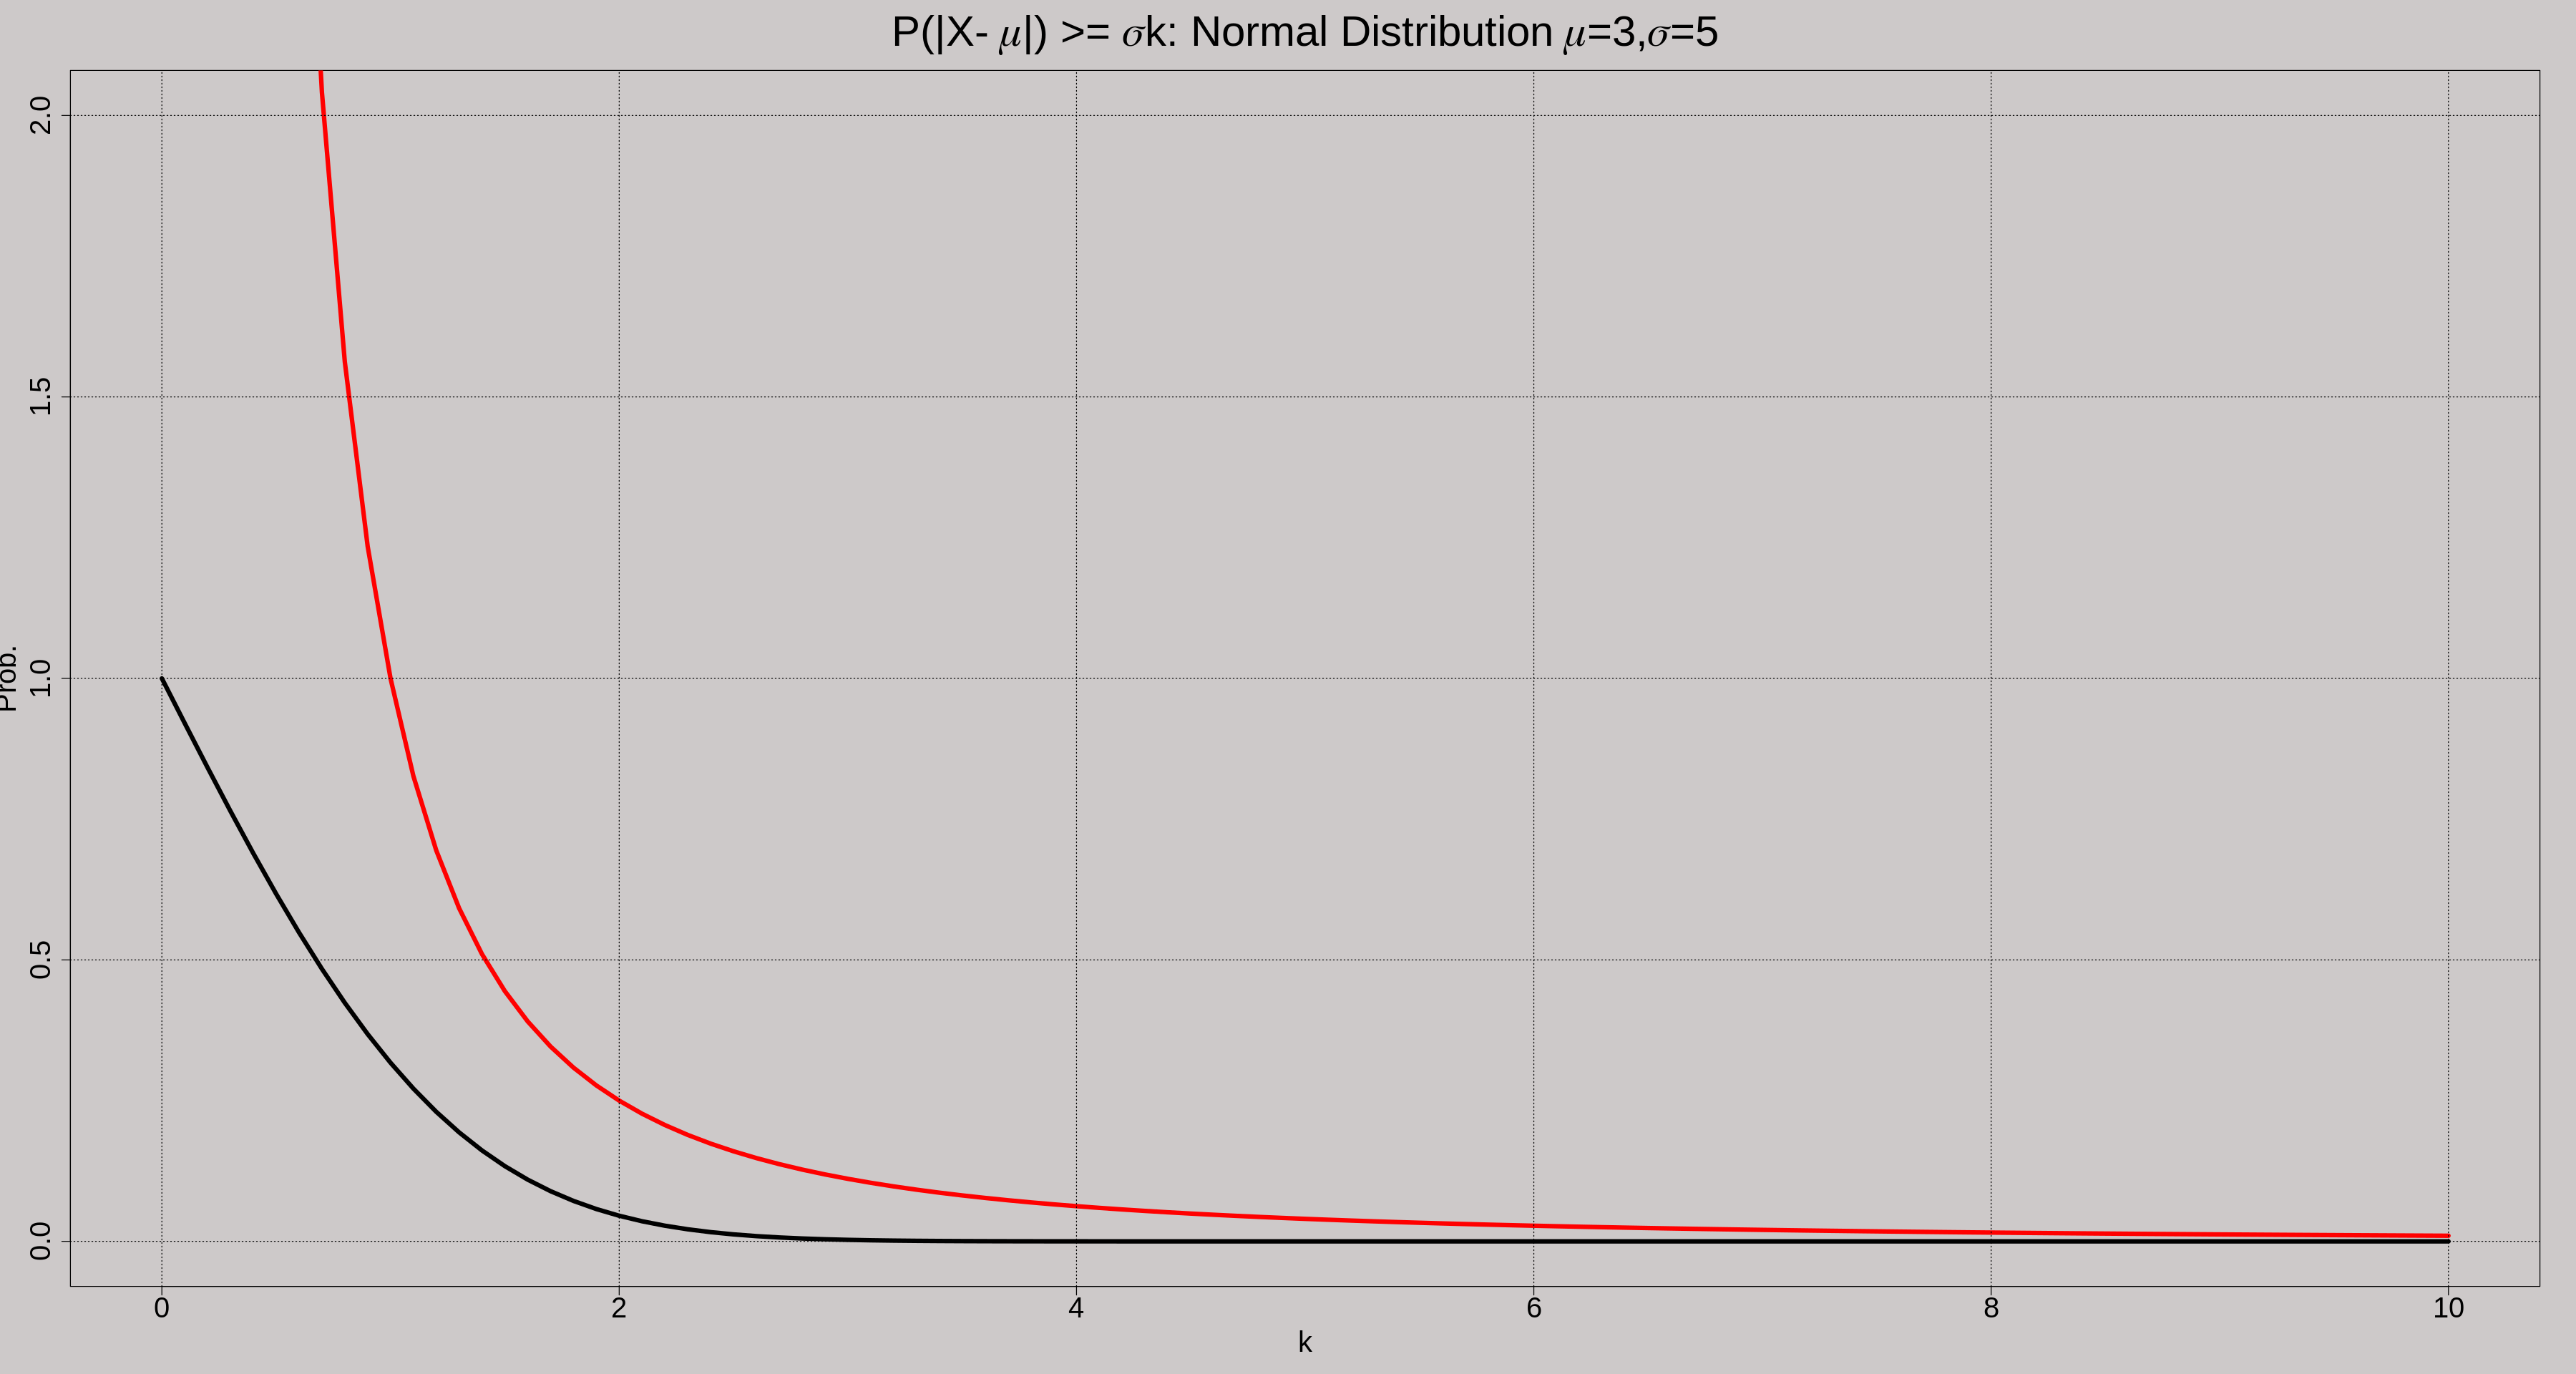

In [35]:
mu <- 3                      
sigma <- 5                    
x <- seq(0,10,0.1)
y <- 1 - pnorm((x*sigma+mu),mean=mu,sd=sigma) + pnorm((-x*sigma+mu),mean=mu,sd=sigma)


xn <- x[-1]
ubound <- 1/(xn^2)   

par(bg="snow3")
plot(x,y, type='l',lwd=5, col='black', xlab='k', ylab="Prob.",  
    main=expression("P(|X- 𝜇|) >= 𝜎k: Normal Distribution 𝜇=3,𝜎=5"),
     ylim=c(0,2), cex.main=3, cex.lab=2, cex.axis=2)
lines(xn,ubound, type='l', col='red', lwd=5)+grid(col="black")

### Exponential

integer(0)

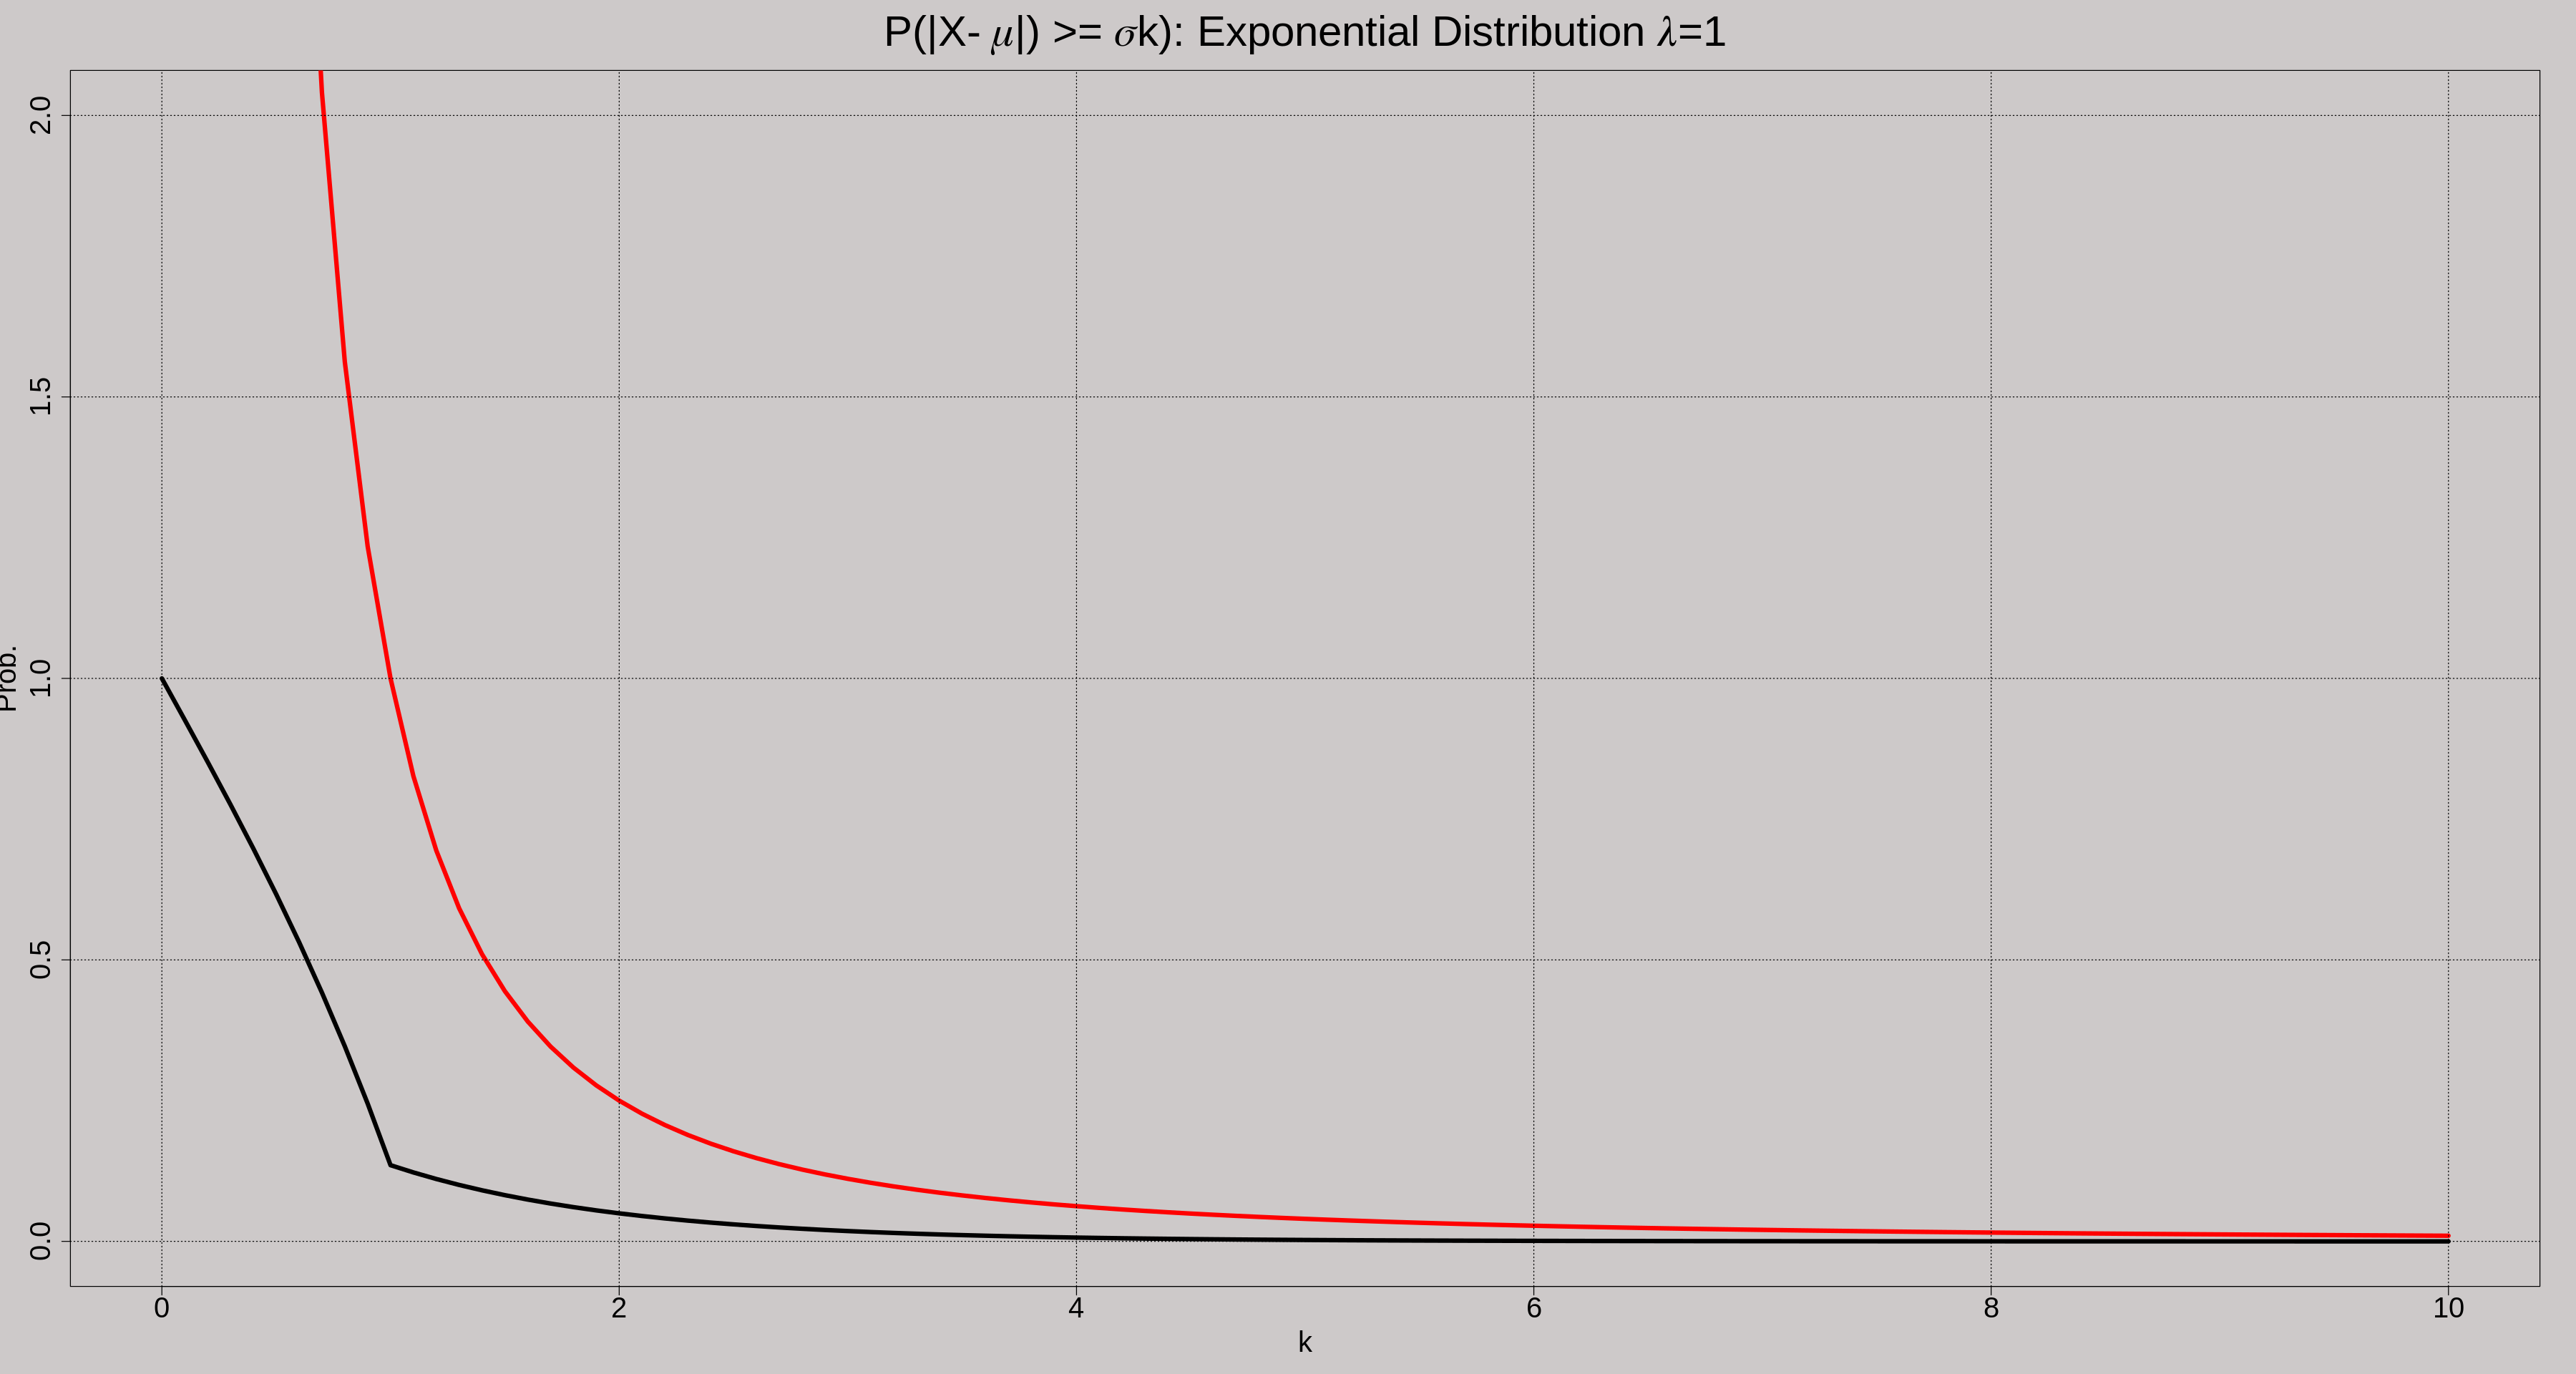

In [36]:
lambda <- 1                      
mu <- 1/lambda
sigma <- 1/lambda
x <- seq(0,10,0.1)
y <- 1 - pexp((x*sigma+mu),rate=lambda) + pexp((-x*sigma+mu),rate=lambda)


xn <- x[-1]
ubound <- 1/(xn^2)   

par(bg="snow3")
plot(x,y, type='l',lwd=5, col='black', xlab='k', ylab="Prob.",  
    main=expression("P(|X- 𝜇|) >= 𝜎k): Exponential Distribution 𝜆=1"),
     ylim=c(0,2), cex.main=3, cex.lab=2, cex.axis=2)
lines(xn,ubound, type='l', col='red', lwd=5)+grid(col="black")

### Uniform

integer(0)

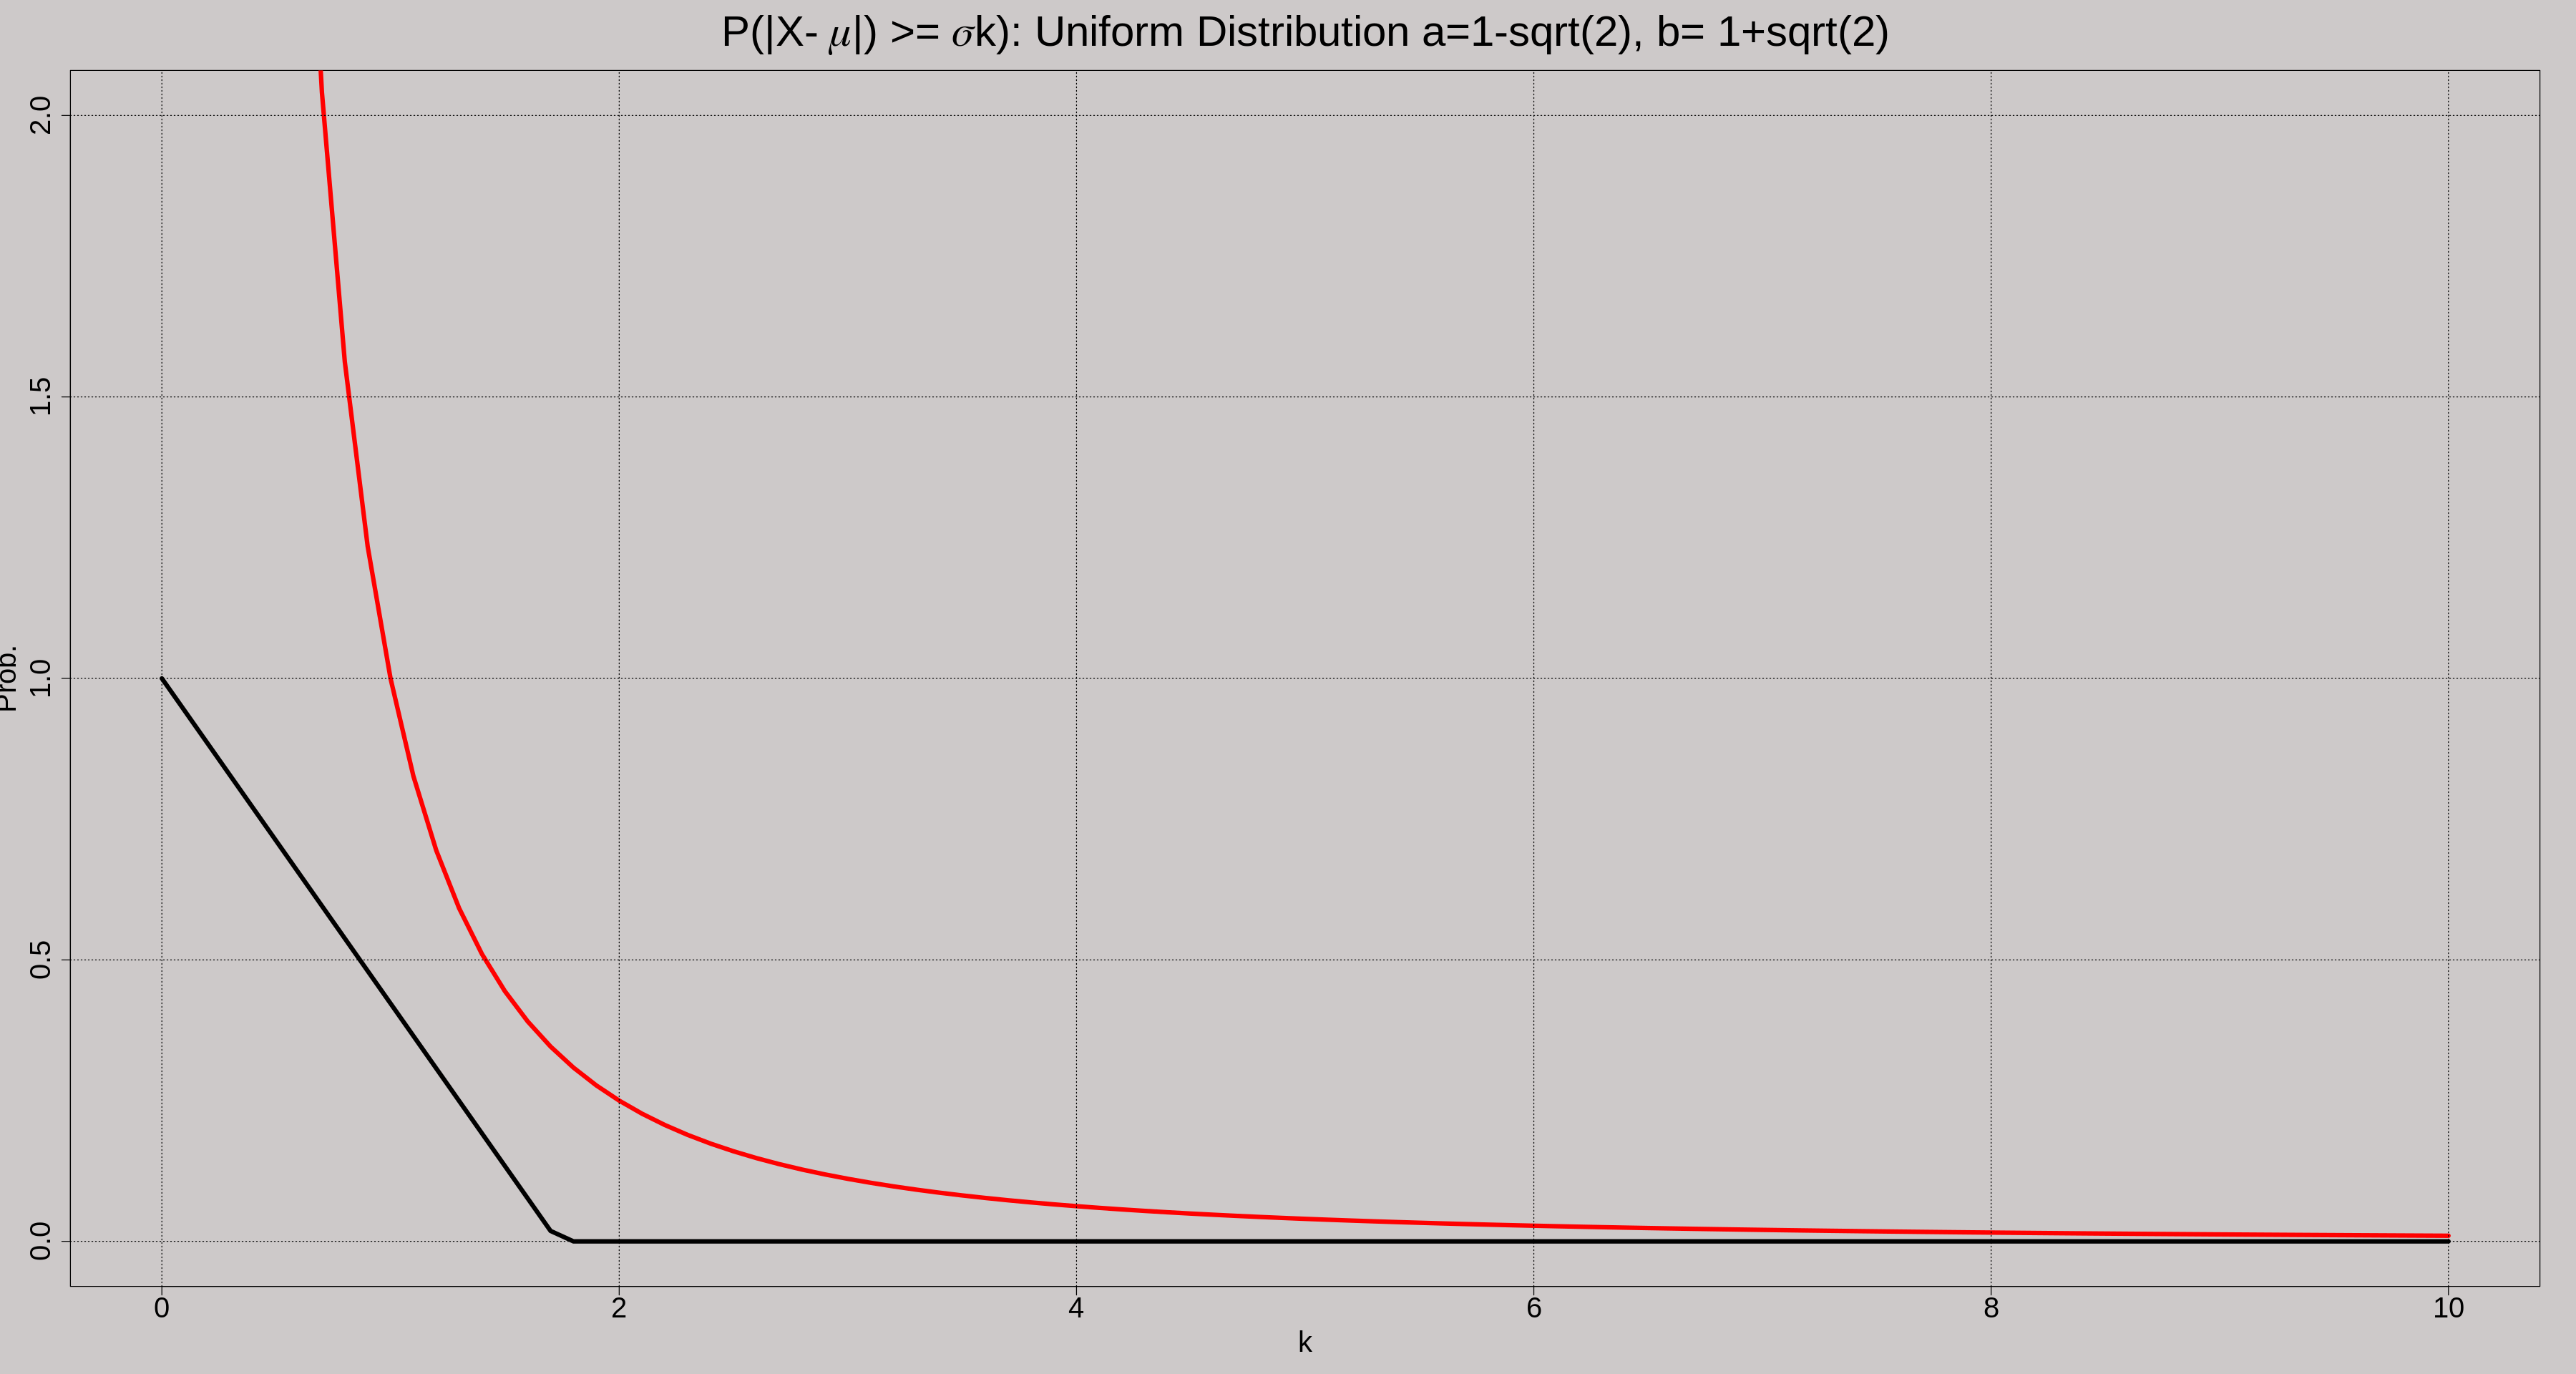

In [38]:
a<- 1-sqrt(2)                     
b<- 1+sqrt(2) 
mu <- (a+b)*0.5

sigma <- (b-a)/sqrt(12)
x <- seq(0,10,0.1)
y <- 1 - punif((x*sigma+mu),min=a,max=b) + punif((-x*sigma+mu),min=a,max=b)


xn <- x[-1]
ubound <- 1/(xn^2)   

par(bg="snow3")
plot(x,y, type='l',lwd=5, col='black', xlab='k', ylab="Prob.",  
    main=expression("P(|X- 𝜇|) >= 𝜎k): Uniform Distribution a=1-sqrt(2), b= 1+sqrt(2)"),
     ylim=c(0,2), cex.main=3, cex.lab=2, cex.axis=2)
lines(xn,ubound, type='l', col='red', lwd=5)+grid(col="black")

### Poisson

integer(0)

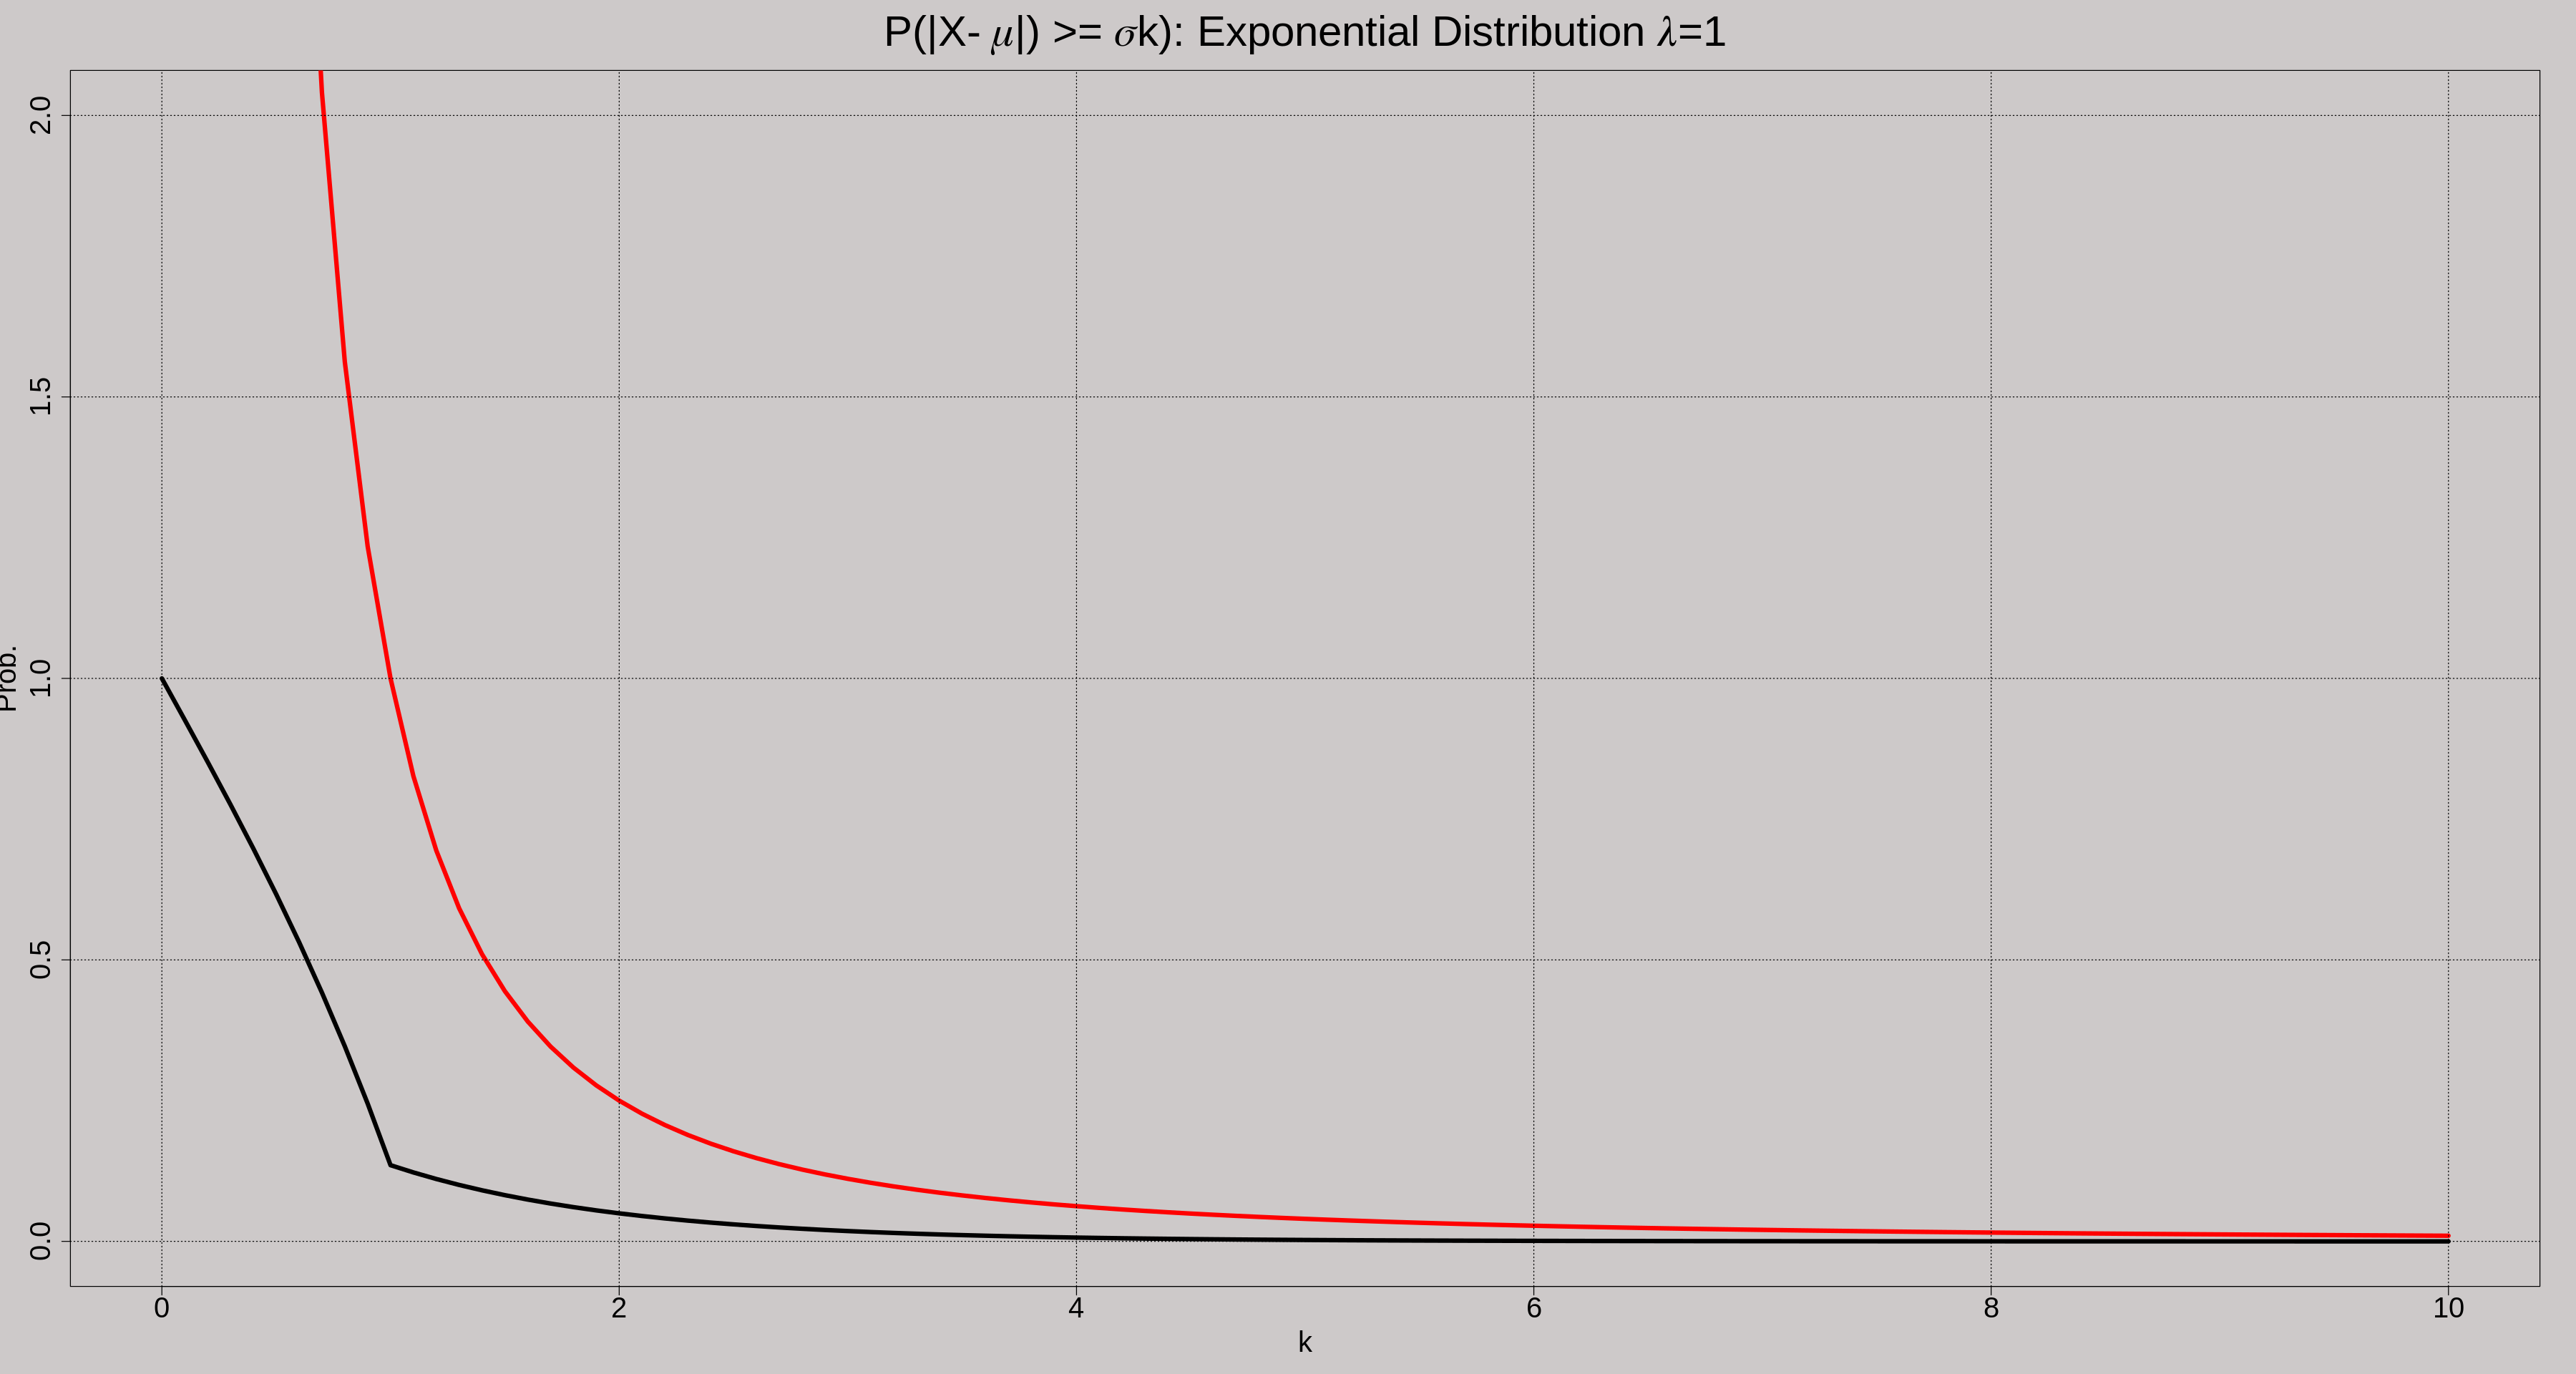

In [39]:
lambda <- 1                      
mu <- lambda
sigma <- lambda
x <- seq(0,10,0.1)
y <- 1 - pexp((x*sigma+mu),rate=lambda) + pexp((-x*sigma+mu),rate=lambda)


xn <- x[-1]
ubound <- 1/(xn^2)   

par(bg="snow3")
plot(x,y, type='l',lwd=5, col='black', xlab='k', ylab="Prob.",  
    main=expression("P(|X- 𝜇|) >= 𝜎k): Exponential Distribution 𝜆=1"),
     ylim=c(0,2), cex.main=3, cex.lab=2, cex.axis=2)
lines(xn,ubound, type='l', col='red', lwd=5)+grid(col="black")

# Ex 4

In [13]:
Italy <- read.csv("./DATA/Region/2020_IT_Region_Mobility_Report.csv", sep=",", header=T)
Germany <- read.csv("./DATA/Region/2020_GE_Region_Mobility_Report.csv", sep=",", header=T)
France <- read.csv("./DATA/Region/2020_FR_Region_Mobility_Report.csv", sep=",", header=T)

# To have an idea about the structure
glimpse(Italy)

Rows: 40,764
Columns: 15
$ country_region_code                                <fct> IT, IT, IT, IT, IT,…
$ country_region                                     <fct> Italy, Italy, Italy…
$ sub_region_1                                       <fct> , , , , , , , , , ,…
$ sub_region_2                                       <fct> , , , , , , , , , ,…
$ metro_area                                         <lgl> NA, NA, NA, NA, NA,…
$ iso_3166_2_code                                    <fct> , , , , , , , , , ,…
$ census_fips_code                                   <lgl> NA, NA, NA, NA, NA,…
$ place_id                                           <fct> ChIJA9KNRIL-1BIRb15…
$ date                                               <fct> 2020-02-15, 2020-02…
$ retail_and_recreation_percent_change_from_baseline <int> 3, 3, 0, 3, 0, 2, 1…
$ grocery_and_pharmacy_percent_change_from_baseline  <int> -1, 2, 1, 1, -1, 1,…
$ parks_percent_change_from_baseline                 <int> 35, 26, 7, 16, 11, …
$ transit_stati

 Now i clean the datasets from the `NA`-s and make the `data` column a Date type.

In [14]:
Italy$date <- as.Date(Italy$date)
Germany$date <- as.Date(Germany$date)
France$date <- as.Date(France$date)
Italy<-Italy%>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))
Germany<-Germany%>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))
France<-France%>% filter(!is.na(retail_and_recreation_percent_change_from_baseline)) %>%
             filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))%>%
             filter(!is.na(parks_percent_change_from_baseline))%>%
             filter(!is.na(transit_stations_percent_change_from_baseline))%>%
             filter(!is.na(workplaces_percent_change_from_baseline))%>%
             filter(!is.na(residential_percent_change_from_baseline))

Now i use the function `summarise()` to have a "week base" mean of the data. 

In [44]:
Italy.week<- Italy%>% group_by(week = week(date))%>% summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
            parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
            residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline))

Germany.week<- Germany%>% group_by(week = week(date))%>% summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
            parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
            residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline))

France.week<- France%>% group_by(week = week(date))%>% summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
            parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
            residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline))
Italy.week$week<-lubridate::ymd( "2020-02-15" ) + lubridate::weeks( Italy.week$week - 1 )
Germany.week$week<-lubridate::ymd( "2020-02-15" ) + lubridate::weeks( Germany.week$week - 1 )
France.week$week<-lubridate::ymd( "2020-02-15" ) + lubridate::weeks( France.week$week - 1 )

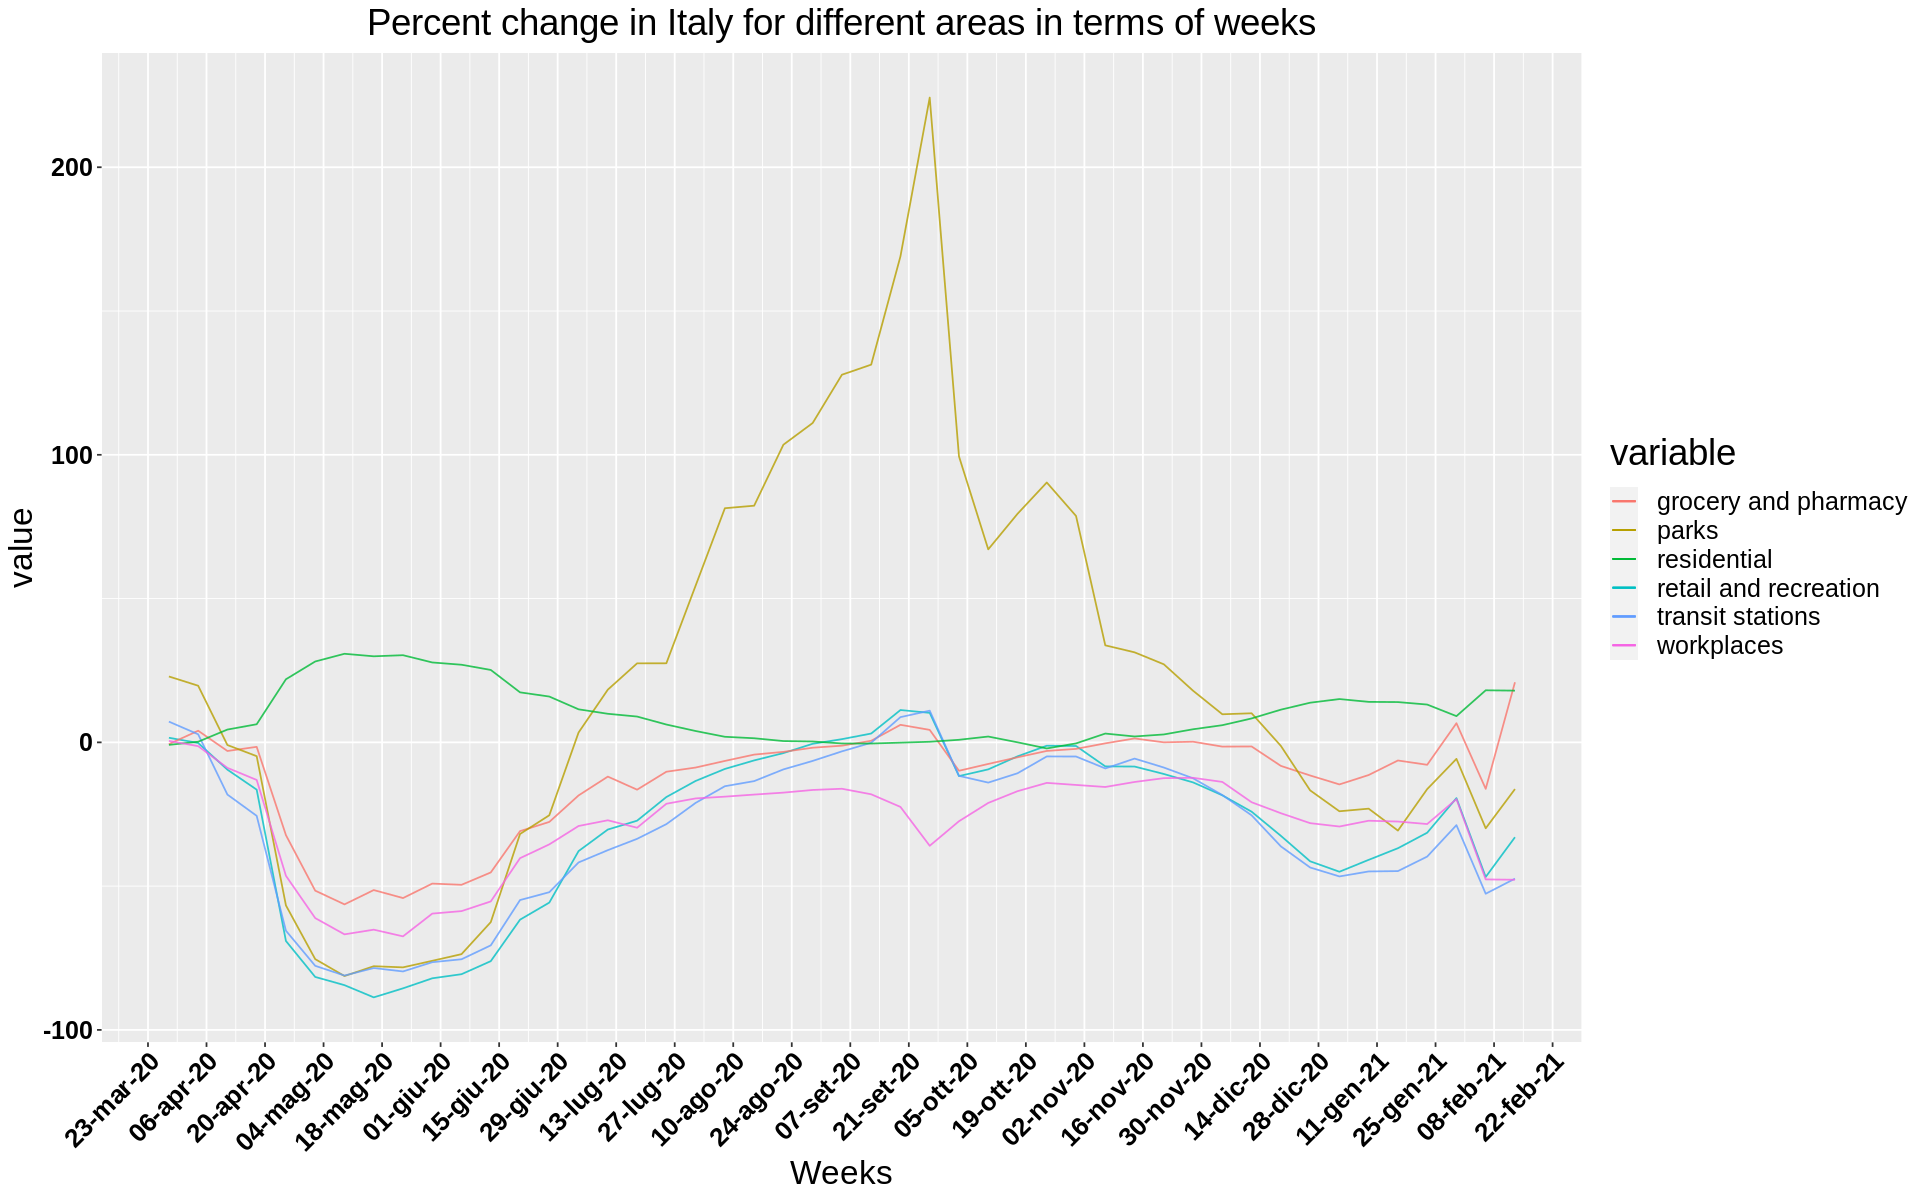

In [45]:
options(repr.plot.width=16, repr.plot.height=10)


ggplot(Italy.week, aes(x=week, y = value, color = variable)) + 
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week") , date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), alpha=0.8) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),alpha=0.8)+
    geom_line(aes(y = parks, col = "parks"), alpha=0.8) + 
    geom_line(aes(y = transit, col = "transit stations"),alpha=0.8) +
    geom_line(aes(y = residential, col = "residential"),alpha=0.8)+
    geom_line(aes(y = workplaces, col = "workplaces"),alpha=0.8)+
    ggtitle("Percent change in Italy for different areas in terms of weeks") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
    theme(plot.title = element_text(hjust = 0.5, size = 22))+
    theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
    theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))+
    xlab("Weeks")

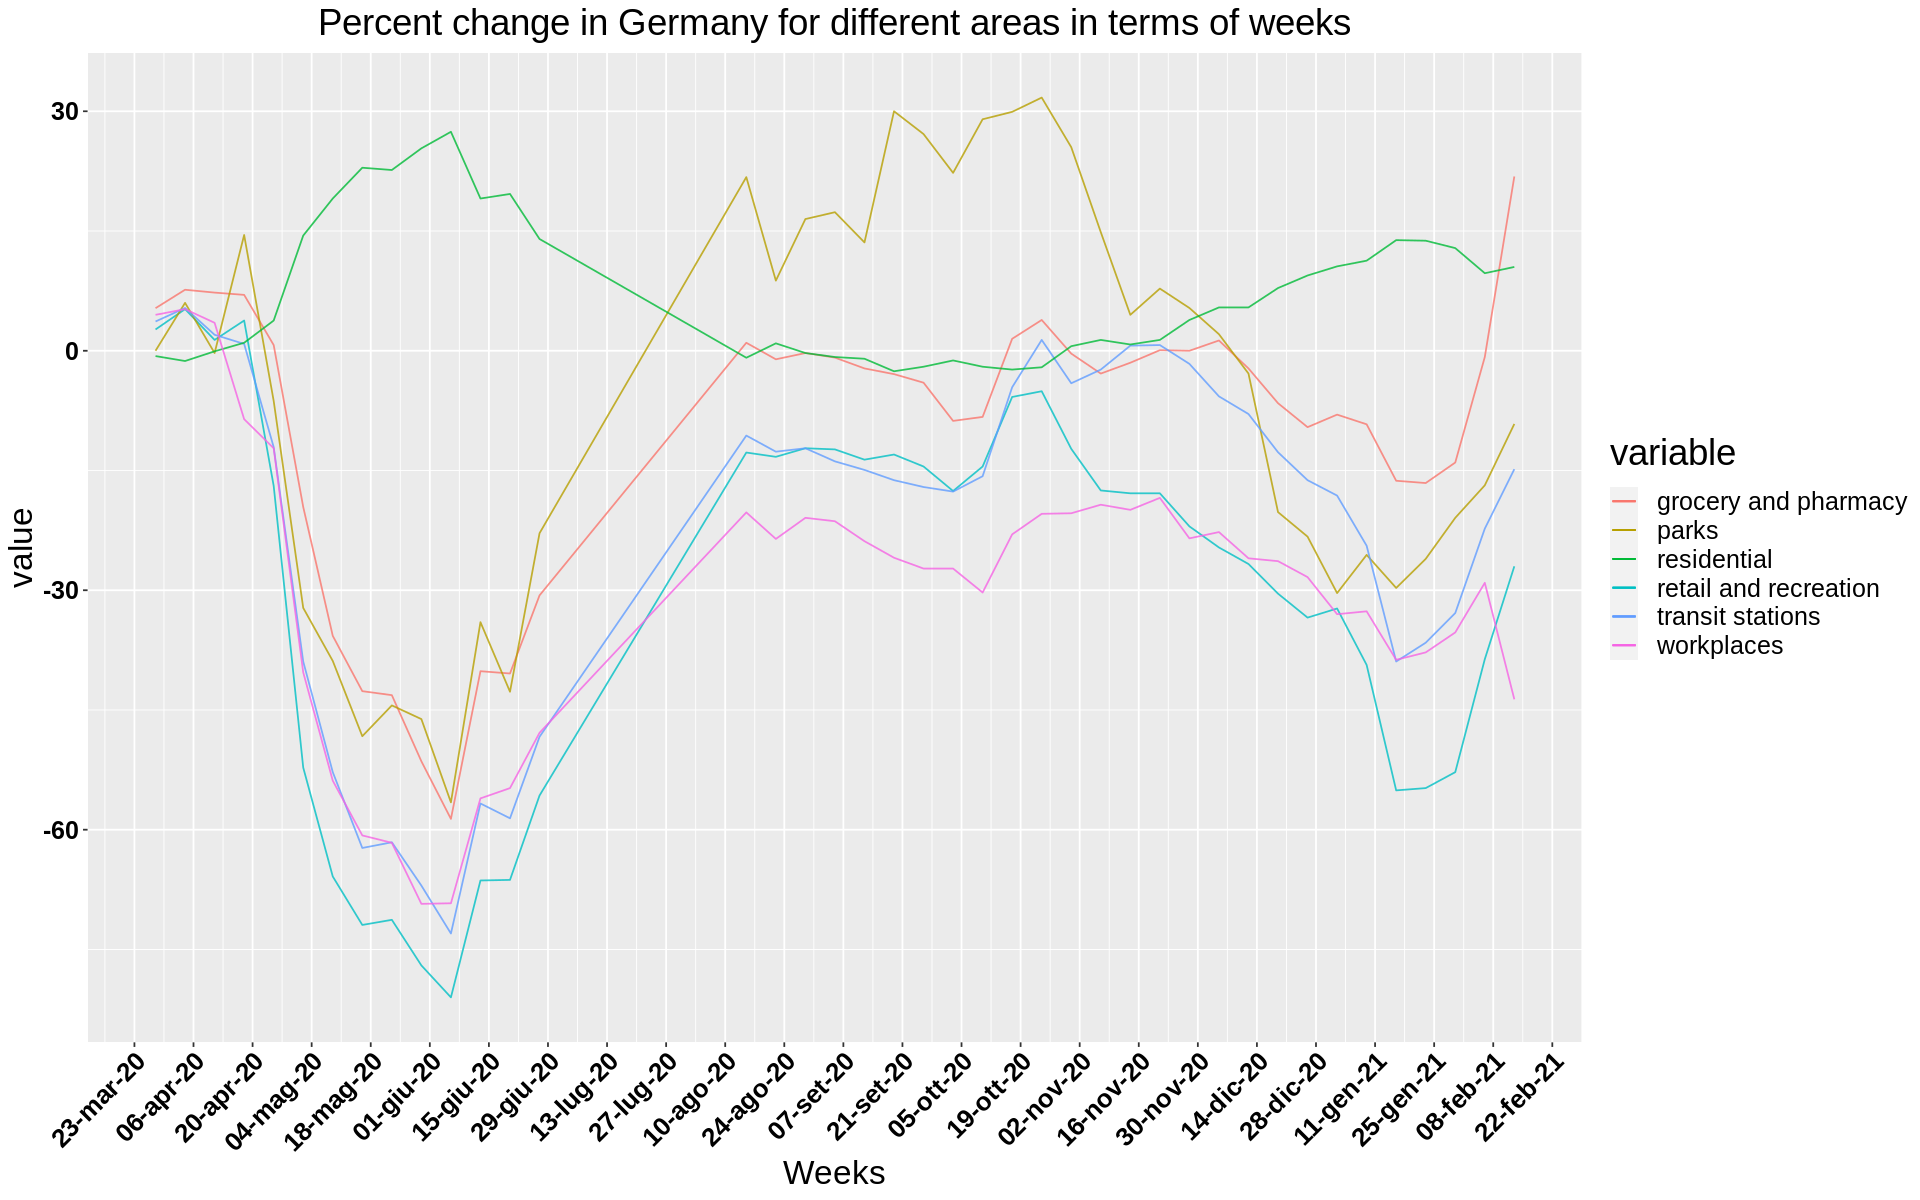

In [46]:
ggplot(Germany.week, aes(x=week, y = value, color = variable)) + 
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week") , date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), alpha=0.8) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),alpha=0.8)+
    geom_line(aes(y = parks, col = "parks"), alpha=0.8) + 
    geom_line(aes(y = transit, col = "transit stations"),alpha=0.8) +
    geom_line(aes(y = residential, col = "residential"),alpha=0.8)+
    geom_line(aes(y = workplaces, col = "workplaces"),alpha=0.8)+
    ggtitle("Percent change in Germany for different areas in terms of weeks") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
    theme(plot.title = element_text(hjust = 0.5, size = 22))+
    theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
    theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))+
    xlab("Weeks")

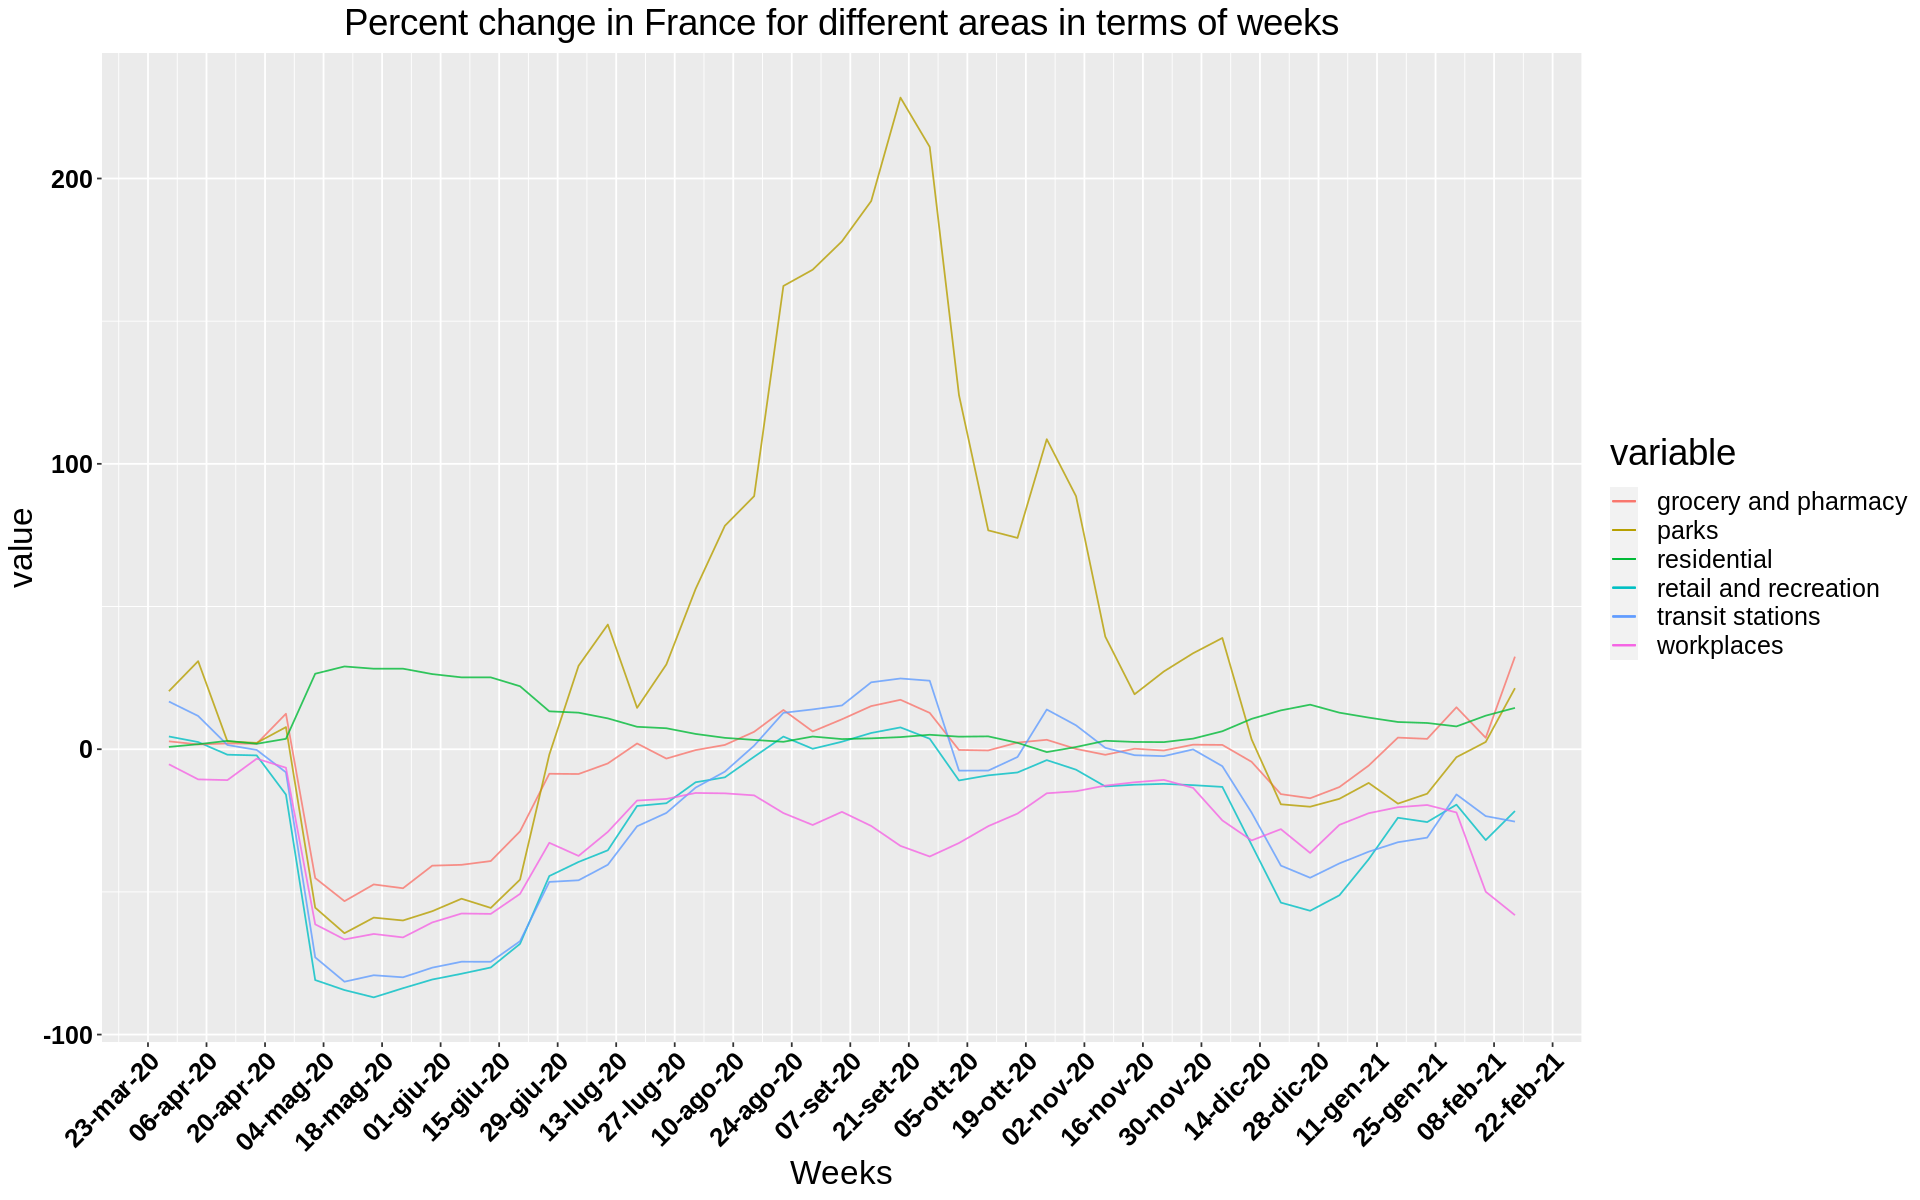

In [47]:
ggplot(France.week, aes(x=week, y = value, color = variable)) + 
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week") , date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), alpha=0.8) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),alpha=0.8)+
    geom_line(aes(y = parks, col = "parks"), alpha=0.8) + 
    geom_line(aes(y = transit, col = "transit stations"),alpha=0.8) +
    geom_line(aes(y = residential, col = "residential"),alpha=0.8)+
    geom_line(aes(y = workplaces, col = "workplaces"),alpha=0.8)+
    ggtitle("Percent change in France for different areas in terms of weeks") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
    theme(plot.title = element_text(hjust = 0.5, size = 22))+
    theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
    theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))+
    xlab("Weeks")

In [22]:
Italy.month<- Italy%>% group_by(month = month(date))%>% summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
            parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
            residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline))

Italy.month$month<-lubridate::ymd( "2020-03-23" ) %m+% months(0:10)

Germany.month<- Germany%>% group_by(month = month(date))%>% summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
            parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
            residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline))

Germany.month$month<-lubridate::ymd( "2020-03-23" ) %m+% months(0:9)

France.month<- France%>% group_by(month = month(date))%>% summarise(retail_and_recreation = mean(retail_and_recreation_percent_change_from_baseline), grocery_and_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline),
            parks=mean(parks_percent_change_from_baseline),transit=mean(transit_stations_percent_change_from_baseline),
            residential=mean(residential_percent_change_from_baseline),workplaces=mean(workplaces_percent_change_from_baseline))

France.month$month<-lubridate::ymd( "2020-03-23" ) %m+% months(0:10)

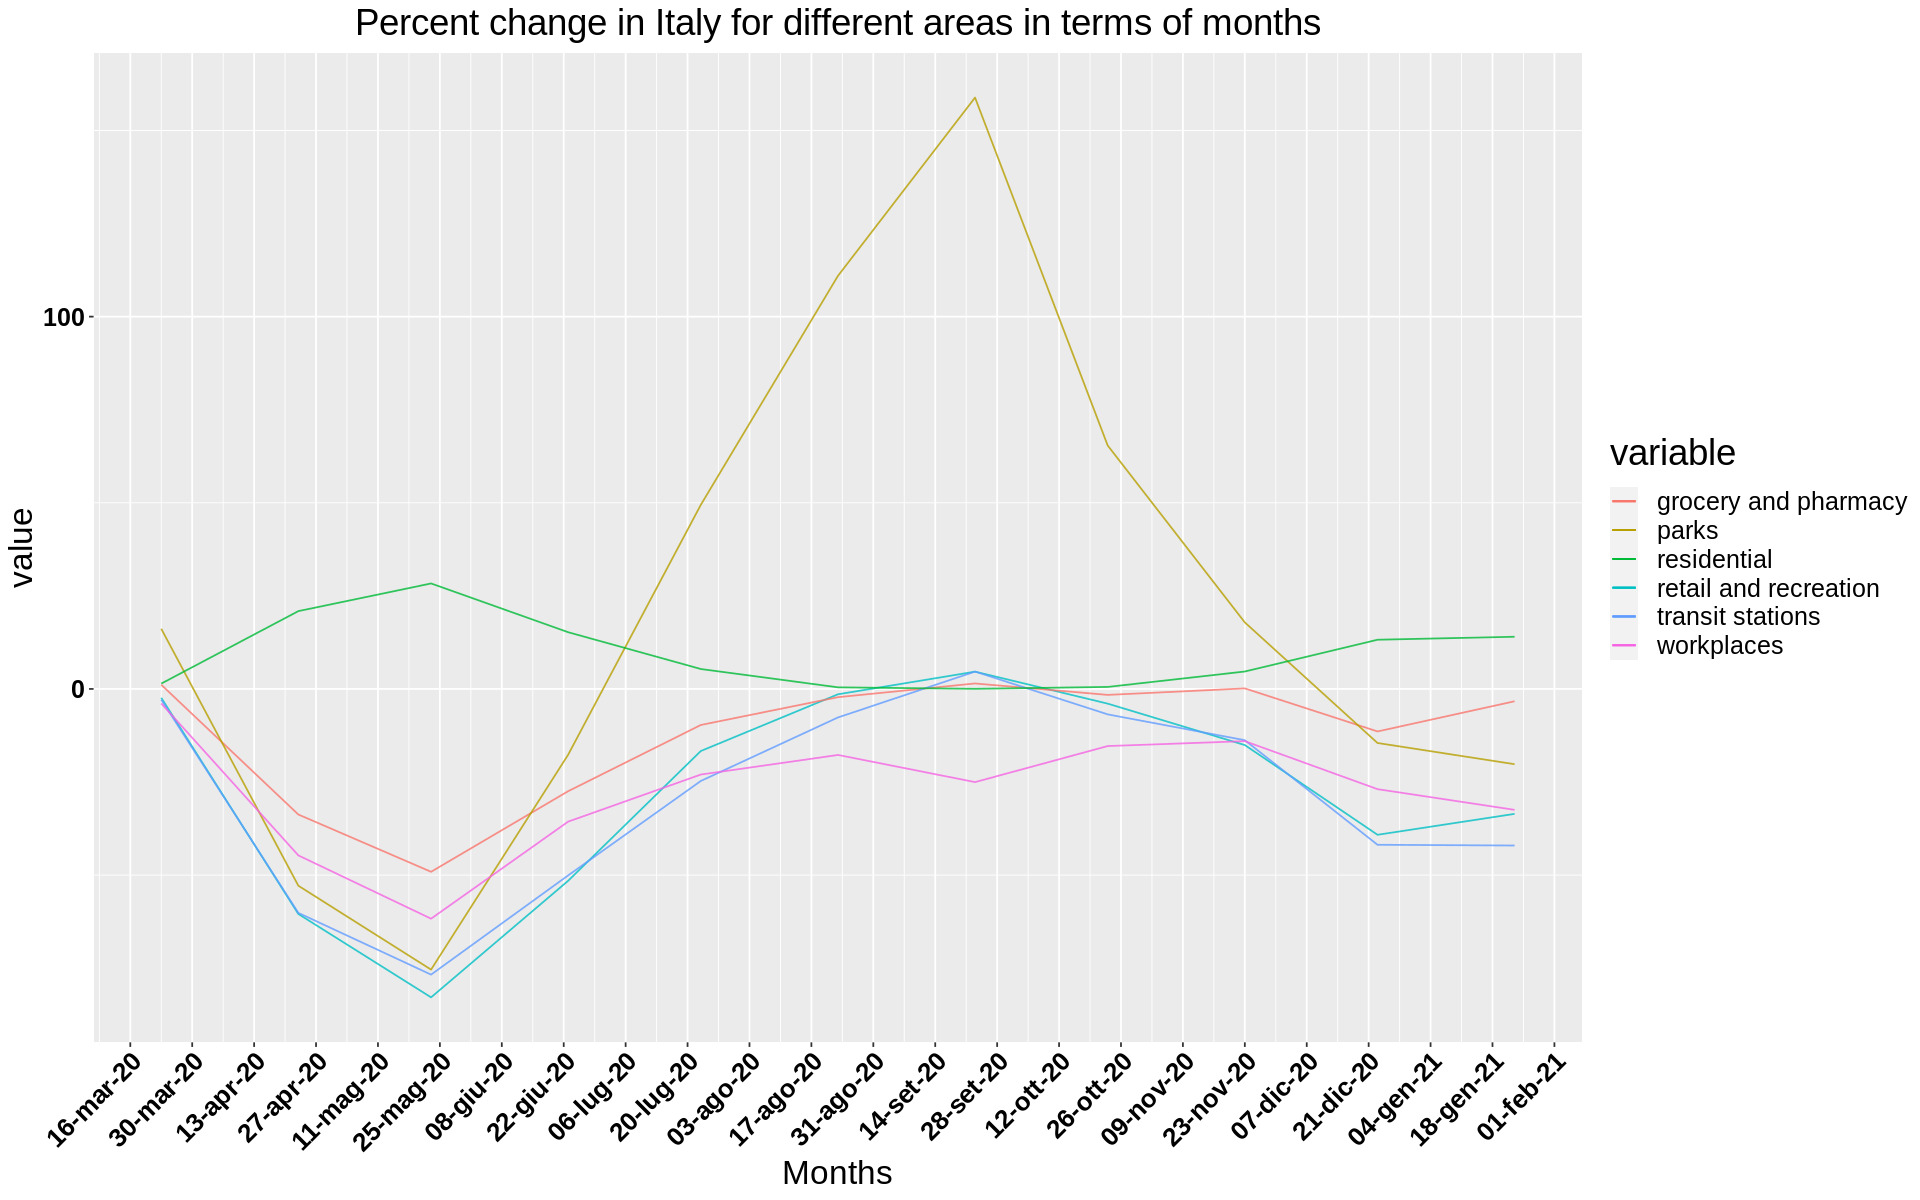

In [10]:
options(repr.plot.width=16, repr.plot.height=10)
ggplot(Italy.month, aes(x=month, y = value, color = variable)) + 
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week") , date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), alpha=0.8) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),alpha=0.8)+
    geom_line(aes(y = parks, col = "parks"), alpha=0.8) + 
    geom_line(aes(y = transit, col = "transit stations"),alpha=0.8) +
    geom_line(aes(y = residential, col = "residential"),alpha=0.8)+
    geom_line(aes(y = workplaces, col = "workplaces"),alpha=0.8)+
    ggtitle("Percent change in Italy for different areas in terms of months") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
    theme(plot.title = element_text(hjust = 0.5, size = 22))+
    theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
    theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))+
    xlab("Months")

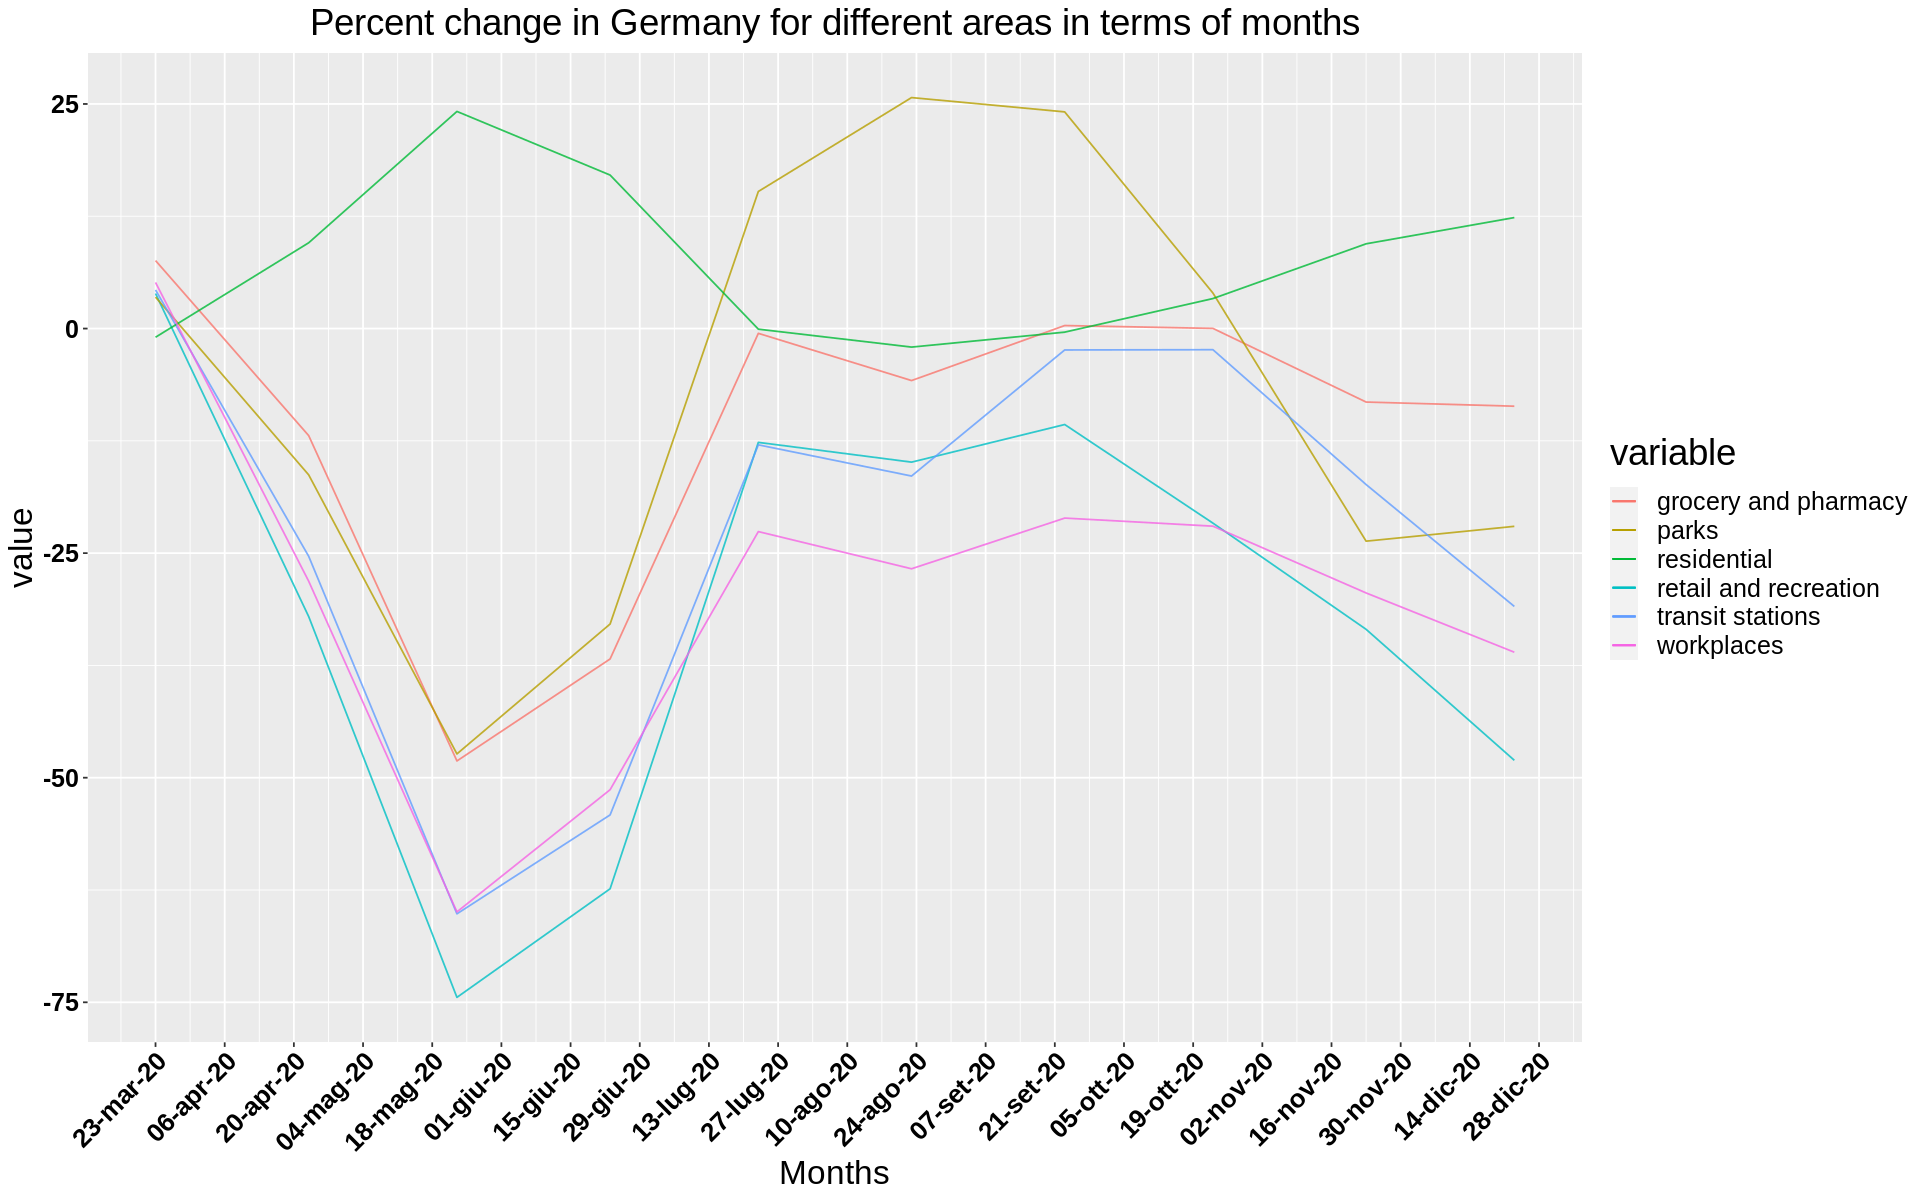

In [23]:
options(repr.plot.width=16, repr.plot.height=10)
ggplot(Germany.month, aes(x=month, y = value, color = variable)) + 
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week") , date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), alpha=0.8) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),alpha=0.8)+
    geom_line(aes(y = parks, col = "parks"), alpha=0.8) + 
    geom_line(aes(y = transit, col = "transit stations"),alpha=0.8) +
    geom_line(aes(y = residential, col = "residential"),alpha=0.8)+
    geom_line(aes(y = workplaces, col = "workplaces"),alpha=0.8)+
    ggtitle("Percent change in Germany for different areas in terms of months") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
    theme(plot.title = element_text(hjust = 0.5, size = 22))+
    theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
    theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))+
    xlab("Months")

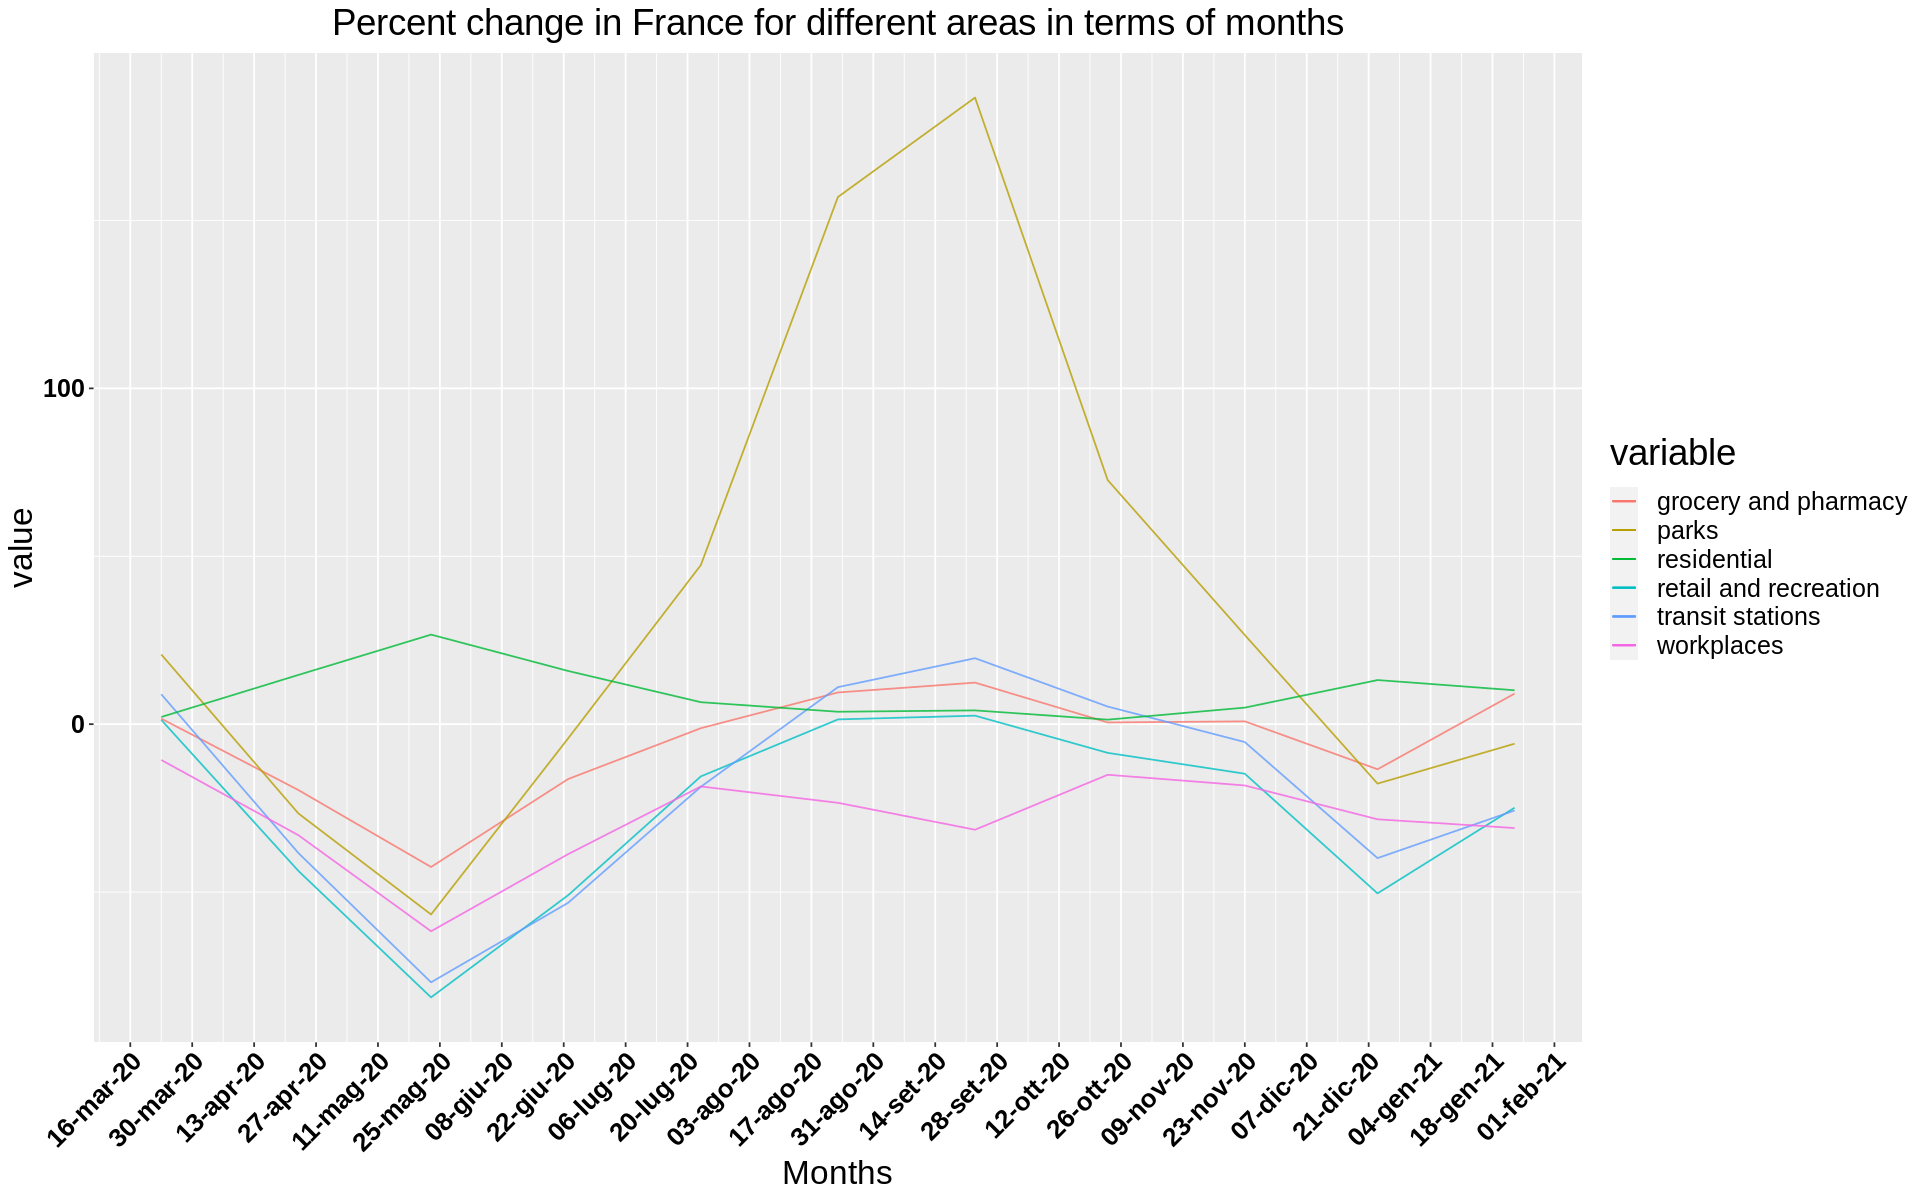

In [24]:
options(repr.plot.width=16, repr.plot.height=10)
ggplot(France.month, aes(x=month, y = value, color = variable)) + 
    scale_x_date(breaks = date_breaks("2 weeks"),minor_breaks = date_breaks("1 week") , date_labels = "%d-%b-%y")+
    geom_line(aes(y = retail_and_recreation, col = "retail and recreation"), alpha=0.8) + 
    geom_line(aes(y = grocery_and_pharmacy, col = "grocery and pharmacy"),alpha=0.8)+
    geom_line(aes(y = parks, col = "parks"), alpha=0.8) + 
    geom_line(aes(y = transit, col = "transit stations"),alpha=0.8) +
    geom_line(aes(y = residential, col = "residential"),alpha=0.8)+
    geom_line(aes(y = workplaces, col = "workplaces"),alpha=0.8)+
    ggtitle("Percent change in France for different areas in terms of months") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1,colour = "black", size = rel(1.3)))+
    theme(axis.text.y = element_text(angle = 0, hjust = 1,colour = "black", size = 15))+
    theme(plot.title = element_text(hjust = 0.5, size = 22))+
    theme(axis.text=element_text(hjust = 0.5, size=12, face="bold"), axis.title=element_text(size=20))+
    theme(legend.title = element_text(size = 22),legend.text = element_text(size = 15))+
    xlab("Months")